In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import numpy as np
import upsetplot
from upsetplot import plot
import seaborn as sns
from sklearn.metrics import confusion_matrix
import disarray

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

# data

## positive and negative dataset sequences

In [3]:
# positive dataset
seqs_path_pos = "/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/minc_nr_positive_dataset.fasta"

In [4]:
# negative dataset
seqs_path_neg = "/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/minc_nr_negative_dataset.fasta"

In [5]:
# Positive dataset
# create an empty dictionary
dict_seqs_pos = {}

# here we are parsing the file with the dataset sequences
# specifying the format fasta
records_pos = SeqIO.parse(seqs_path_pos, "fasta")

# here we are filling the dictionary with {sequence_id : sequence}
for record_pos in records_pos: 
    record_sequence_pos = str(record_pos.seq)
    dict_seqs_pos.update({record_pos.id : record_sequence_pos})
    
# the dictionary {sequence_id : sequence}
dict_seqs_pos

{'Minc3s00007g00481': 'MKYYILSAILKRIILIKIIFLETTNFALSQTITPPCSCSNVKPNFGTNSNIPQQLCVPPLAYDQKSVWLTWNKPDNYENIADFNVYMAGKKIGSAKANSAVNTLSGPYIQNFYKNDLNNFHTKILFTTYLVTGLNPNTIYTFTVRAVDANGAESGNSNQVVVKTAENYGKIVDITTFGATGDGTTLNTQAIQKAIDSCSSSTSAFGCKVLIPKGIFLSGPLFLRSQMTFELANGAILRATSNPSKFPNQYGNTPSAFLNALNGSLTNIRVIGPGSVDGNGWKLASNAIDELGRQIPVYAKGSPSTVNNLGILAANQVQTHGNNYYSRSRLANFNFVTNLHIGGGITFINPSMTTIGLADSKNVSIISVRFQTYNINNGDGIDIGRSSNIQIIGSFFDTGDDCIAMGTGCGSNAGQGAPVQCILIKNNYFRHGHGAPAFGGSAGDGIKDVLVEDNVAFLTDNGIRFKSSPQCGGGAQNVYARDIAMQSVGSYNNFTFGGRQFSGDTTAGHPFVFMLDYDSNPSGNAKIPAQFKDITITRCSVDNIKPTKSGEILYAVGHDGGNIYQPVYNKNIVRFFNKLIAYSTPYGLDRDVLYFWGWDLDWR',
 'Minc3s00008g00574': 'MSNKLIISILILTIIYTVVNSLTVPEQNAVVDCINKYRSQLANGKTKNKNGGNFPSGKDILEVSYSKDLEKSAQRWANKCIFDHNGTDLYSGGKFYGENLYLDGDFEHKNITQLMIDACNAWWGESTTDGVPPSWINNFLPTDNKENDEKFEAVGHWTQMAWAKTYQIGCALKVCHKPDCNGNLIDCRYYPGGNGMGSPIYQQGKPASGCGKAGPSTKYSGLCKPDPHQNN',
 'Minc3s00011g00761': 'MIIYKDVFTEDELSSDSYPMKLVDDLIFEFKGRQVVRKEGDIALAGANPSAEEMDEGTEEHVERGIDFVLNHRLQEMNCYEDQATFKAYIK

In [6]:
# by grep '>' nr_positive_dataset.faa | wc -l
# we checked the number of sequences in the fasta file was 624
len(dict_seqs_pos)

161

In [7]:
# Negative dataset
# create an empty dictionary
dict_seqs_neg = {}

# here we are parsing the file with the dataset sequences
# specifying the format fasta
records_neg = SeqIO.parse(seqs_path_neg, "fasta")

# here we are filling the dictionary with {sequence_id : sequence}
for record_neg in records_neg: 
    record_sequence_neg = str(record_neg.seq)
    dict_seqs_neg.update({record_neg.id : record_sequence_neg})
    
# the dictionary {sequence_id : sequence}
dict_seqs_neg

{'Minc3s00001g00059': 'MSELDQLRQEAEQLKSQIREARKQANDTTLASVAANLEPIGRIQMRTRRTLRGHLAKIYAMHWASDSRNLVSASQDGKLIVWDSYTTNKVHAIPLRSSWVMTCAYAPSGSFVACGGLDNICSIYSLKTREGNVRVSRELPGHTGYLSCCRFLDDNQIVTSSGDMTCALWDIETGQQLTTFTGHTGDVMSLSLSPDMRTFISGACDASAKLWDIREGMCKQTFPGHESDINAVSFFPNGHAFATGSDDATCRLFDIRADQELAMYSHDNIICGITSVAFSKSGRLLFAGYDDFNCNVWDSMRQERAGVLAGHDNRVSCLGVTDDGMAVCTGSWDSFLKIWN',
 'Minc3s00002g00155': 'MASNSKKSRKSLNNSAHSDNEDDESSRSSMYDRDDSERKNKEQFGHWECTVCTFQNKQEAFKCLMCDTRKGTSTRKPRLNPSVVQQQTLVQKLAVEVERQKKQRNAEAQSSPDPLSSPYSNAGLNFVNNETALQSGSYSNGGKQQNSLLHRRMTFRDSLVVRSSAKKTIVTVGGKNFTITEFKPRISSRGRKKSTNGNNIVQ',
 'Minc3s00006g00398': 'MPAEAANNGGNTTTEKSENVTEQTKKAPVIFLFDVDGTLTMPRQKITDEMLQFMRNLSQRVPIAVVGGSDLCKIFEQLPNEDNELLKLFSFIFAENGLMGFEGVEELPRASITKELGEKRLQDLTNFCLRYMSEIDLPLKRGTFIELRNGMMNVCPIGRSCTQEERMSFVEYENKFPVRQDFVKALEQRFPVNENSLKFSIGGQISIDIFPSGWDKTFCMRYLEPKYEAIHFFGDKTTPGGNDYEIFIHPGTVGHSVTDPIDCCKQVTETLGQLGL',
 'Minc3s00006g00399': 'MTTKNLKNEIFVKEEIVEEEEEEMRIDEDGKLKKGGEGERGEIQNGIDGGGILVDKNTKITSTQTATNGRPPRKNGILFAA

In [8]:
# by grep '>' nr_positive_dataset.faa | wc -l
# we checked the number of sequences in the fasta file was 4241
len(dict_seqs_neg)

495

## positive and negative dataset information

### positive

In [9]:
complete_positive_dataset = pd.read_csv(
    '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/complete_datasets/complete_positive_dataset.tsv',
sep = '\t')

In [10]:
complete_positive_dataset.head()

,id,sp_tag,sp_sp,sp_other,sp_csposition,tm_expaa,tm_first60,tm_predhel,tm_topology,tm_spcleaved,...,aromatic,non_polar,polar,charged,basic,acidic,helix,turn,sheet,spp
0,Minc3s00007g00481,OTHER,0.450817,0.549183,NaN,2.04,1.75,0,o,0,...,0.119403,0.558872,0.441128,0.154229,0.089552,0.064677,0.313433,0.323383,0.160862,minc
1,Minc3s00008g00574,SP(Sec/SPI),0.984133,0.015867,CS pos: 21-22. VNS-LT. Pr: 0.9027,0.00,0.00,0,o,1,...,0.121212,0.528139,0.471861,0.220779,0.121212,0.099567,0.268398,0.311688,0.173160,minc
2,Minc3s00011g00761,OTHER,0.000737,0.999263,NaN,0.00,0.00,0,o,0,...,0.106145,0.502793,0.497207,0.357542,0.150838,0.206704,0.301676,0.139665,0.312849,minc
3,Minc3s00013g00811,SP(Sec/SPI),0.999210,0.000790,CS pos: 25-26. IEA-RA. Pr: 0.6526,0.00,0.00,0,i,1,...,0.061538,0.646154,0.353846,0.169231,0.061538,0.107692,0.323077,0.169231,0.200000,minc
4,Minc3s00020g01281,SP(Sec/SPI),0.998039,0.001961,CS pos: 25-26. VST-DN. Pr: 0.3942,20.62,20.62,1,i13-35o,1,...,0.218391,0.724138,0.275862,0.114943,0.068966,0.045977,0.356322,0.367816,0.149425,minc


In [11]:
# in order to then combine the information of the two datasets
# we add the column 'true_label', that will allow us later to 
# distinguish sequences from the positive and negative dataset
complete_positive_dataset['true_label'] = 1
complete_positive_dataset = complete_positive_dataset[
    complete_positive_dataset['spp'] == 'minc']

In [12]:
complete_positive_dataset.head()

,id,sp_tag,sp_sp,sp_other,sp_csposition,tm_expaa,tm_first60,tm_predhel,tm_topology,tm_spcleaved,...,non_polar,polar,charged,basic,acidic,helix,turn,sheet,spp,true_label
0,Minc3s00007g00481,OTHER,0.450817,0.549183,NaN,2.04,1.75,0,o,0,...,0.558872,0.441128,0.154229,0.089552,0.064677,0.313433,0.323383,0.160862,minc,1
1,Minc3s00008g00574,SP(Sec/SPI),0.984133,0.015867,CS pos: 21-22. VNS-LT. Pr: 0.9027,0.00,0.00,0,o,1,...,0.528139,0.471861,0.220779,0.121212,0.099567,0.268398,0.311688,0.173160,minc,1
2,Minc3s00011g00761,OTHER,0.000737,0.999263,NaN,0.00,0.00,0,o,0,...,0.502793,0.497207,0.357542,0.150838,0.206704,0.301676,0.139665,0.312849,minc,1
3,Minc3s00013g00811,SP(Sec/SPI),0.999210,0.000790,CS pos: 25-26. IEA-RA. Pr: 0.6526,0.00,0.00,0,i,1,...,0.646154,0.353846,0.169231,0.061538,0.107692,0.323077,0.169231,0.200000,minc,1
4,Minc3s00020g01281,SP(Sec/SPI),0.998039,0.001961,CS pos: 25-26. VST-DN. Pr: 0.3942,20.62,20.62,1,i13-35o,1,...,0.724138,0.275862,0.114943,0.068966,0.045977,0.356322,0.367816,0.149425,minc,1


In [13]:
print(complete_positive_dataset.shape)
# here we are checking if the number of rows of the df with the 
# positive dataset information matches the number of sequences of the 
# positive dataset we imported
print(complete_positive_dataset.shape[0] == len(dict_seqs_pos))

(161, 46)
True


In [14]:
lst_minc_ids = list(complete_positive_dataset.id)
dict_seqs_pos = {id_minc: dict_seqs_pos[id_minc] for id_minc in lst_minc_ids}
dict_seqs_pos

{'Minc3s00007g00481': 'MKYYILSAILKRIILIKIIFLETTNFALSQTITPPCSCSNVKPNFGTNSNIPQQLCVPPLAYDQKSVWLTWNKPDNYENIADFNVYMAGKKIGSAKANSAVNTLSGPYIQNFYKNDLNNFHTKILFTTYLVTGLNPNTIYTFTVRAVDANGAESGNSNQVVVKTAENYGKIVDITTFGATGDGTTLNTQAIQKAIDSCSSSTSAFGCKVLIPKGIFLSGPLFLRSQMTFELANGAILRATSNPSKFPNQYGNTPSAFLNALNGSLTNIRVIGPGSVDGNGWKLASNAIDELGRQIPVYAKGSPSTVNNLGILAANQVQTHGNNYYSRSRLANFNFVTNLHIGGGITFINPSMTTIGLADSKNVSIISVRFQTYNINNGDGIDIGRSSNIQIIGSFFDTGDDCIAMGTGCGSNAGQGAPVQCILIKNNYFRHGHGAPAFGGSAGDGIKDVLVEDNVAFLTDNGIRFKSSPQCGGGAQNVYARDIAMQSVGSYNNFTFGGRQFSGDTTAGHPFVFMLDYDSNPSGNAKIPAQFKDITITRCSVDNIKPTKSGEILYAVGHDGGNIYQPVYNKNIVRFFNKLIAYSTPYGLDRDVLYFWGWDLDWR',
 'Minc3s00008g00574': 'MSNKLIISILILTIIYTVVNSLTVPEQNAVVDCINKYRSQLANGKTKNKNGGNFPSGKDILEVSYSKDLEKSAQRWANKCIFDHNGTDLYSGGKFYGENLYLDGDFEHKNITQLMIDACNAWWGESTTDGVPPSWINNFLPTDNKENDEKFEAVGHWTQMAWAKTYQIGCALKVCHKPDCNGNLIDCRYYPGGNGMGSPIYQQGKPASGCGKAGPSTKYSGLCKPDPHQNN',
 'Minc3s00011g00761': 'MIIYKDVFTEDELSSDSYPMKLVDDLIFEFKGRQVVRKEGDIALAGANPSAEEMDEGTEEHVERGIDFVLNHRLQEMNCYEDQATFKAYIK

In [15]:
print(complete_positive_dataset.shape)
# here we are checking if the number of rows of the df with the 
# positive dataset information matches the number of sequences of the 
# positive dataset we imported
print(complete_positive_dataset.shape[0] == len(dict_seqs_pos))

(161, 46)
True


In [16]:
def save_dataset_to_file(dataset_ids, dataset = ""):
    """save_dataset_to_file
       --------------------
       This function stores a dataset ids to 
       a csv file.
       
       Arguments:
       dataset_ids -- dictionary of dataset ids
       dataset -- string to indicate if it's the positive or negative dset.
    """
    
    dset_ids = list(dataset_ids)
    name_col = dataset + "_dataset" + "_ids"
    name_file = name_col +".csv"
    df_dset_ids = pd.DataFrame(dset_ids)
    df_dset_ids.rename(columns = {0:name_col}, inplace = True)
    df_dset_ids.to_csv(name_file)
    return df_dset_ids

In [17]:
save_dataset_to_file(dict_seqs_pos, dataset = "pos")

,pos_dataset_ids
0,Minc3s00007g00481
1,Minc3s00008g00574
2,Minc3s00011g00761
3,Minc3s00013g00811
4,Minc3s00020g01281
...,...
156,Minc04584
157,Minc06775
158,CL5Contig2_1-EST
159,CL312Contig1_1-EST


### negative

In [18]:
complete_negative_dataset = pd.read_csv(
    '/Users/paolaporracciolo/Documents/work/M1/monster_promoca_for_giulia/MOnSTER/data/datasets/complete_datasets/complete_negative_dataset.tsv',
sep = '\t')

In [19]:
complete_negative_dataset.head()

,id,sp_tag,sp_sp,sp_other,sp_csposition,tm_expaa,tm_first60,tm_predhel,tm_topology,tm_spcleaved,...,aromatic,non_polar,polar,charged,basic,acidic,helix,turn,sheet,spp
0,Minc3s00001g00059,OTHER,0.000372,0.999628,NaN,0.07,0.0,0,o,0,...,0.108824,0.517647,0.482353,0.235294,0.120588,0.114706,0.264706,0.238235,0.232353,minc
1,Minc3s00002g00155,OTHER,0.000999,0.999001,NaN,0.00,0.0,0,o,0,...,0.069307,0.351485,0.648515,0.287129,0.188119,0.099010,0.188119,0.306931,0.173267,minc
2,Minc3s00006g00398,OTHER,0.000677,0.999323,NaN,0.00,0.0,0,o,0,...,0.105072,0.525362,0.474638,0.260870,0.115942,0.144928,0.297101,0.235507,0.250000,minc
3,Minc3s00006g00399,OTHER,0.000419,0.999581,NaN,0.00,0.0,0,o,0,...,0.090136,0.452381,0.547619,0.277211,0.139456,0.137755,0.232993,0.301020,0.234694,minc
4,Minc3s00006g00405,OTHER,0.000281,0.999719,NaN,0.19,0.0,0,o,0,...,0.091821,0.455247,0.544753,0.301698,0.139660,0.162037,0.278549,0.206790,0.296296,minc


In [20]:
# in order to then combine the information of the two datasets
# we add the column 'true_label', that will allow us later to 
# distinguish sequences from the positive and negative dataset
complete_negative_dataset['true_label'] = 0
complete_negative_dataset = complete_negative_dataset[
    complete_negative_dataset['spp'] == 'minc'
]

In [21]:
complete_negative_dataset.head()

,id,sp_tag,sp_sp,sp_other,sp_csposition,tm_expaa,tm_first60,tm_predhel,tm_topology,tm_spcleaved,...,non_polar,polar,charged,basic,acidic,helix,turn,sheet,spp,true_label
0,Minc3s00001g00059,OTHER,0.000372,0.999628,NaN,0.07,0.0,0,o,0,...,0.517647,0.482353,0.235294,0.120588,0.114706,0.264706,0.238235,0.232353,minc,0
1,Minc3s00002g00155,OTHER,0.000999,0.999001,NaN,0.00,0.0,0,o,0,...,0.351485,0.648515,0.287129,0.188119,0.099010,0.188119,0.306931,0.173267,minc,0
2,Minc3s00006g00398,OTHER,0.000677,0.999323,NaN,0.00,0.0,0,o,0,...,0.525362,0.474638,0.260870,0.115942,0.144928,0.297101,0.235507,0.250000,minc,0
3,Minc3s00006g00399,OTHER,0.000419,0.999581,NaN,0.00,0.0,0,o,0,...,0.452381,0.547619,0.277211,0.139456,0.137755,0.232993,0.301020,0.234694,minc,0
4,Minc3s00006g00405,OTHER,0.000281,0.999719,NaN,0.19,0.0,0,o,0,...,0.455247,0.544753,0.301698,0.139660,0.162037,0.278549,0.206790,0.296296,minc,0


In [22]:
print(complete_negative_dataset.shape)
# here we are checking if the number of rows of the df with the 
# negative dataset information matches the number of sequences of the 
# negative dataset we imported
print(complete_negative_dataset.shape[0] == len(dict_seqs_neg))

(495, 46)
True


In [23]:
lst_minc_ids_neg = list(complete_negative_dataset.id)
dict_seqs_neg = {id_minc_neg: dict_seqs_neg[
    id_minc_neg] for id_minc_neg in lst_minc_ids_neg}
dict_seqs_neg

{'Minc3s00001g00059': 'MSELDQLRQEAEQLKSQIREARKQANDTTLASVAANLEPIGRIQMRTRRTLRGHLAKIYAMHWASDSRNLVSASQDGKLIVWDSYTTNKVHAIPLRSSWVMTCAYAPSGSFVACGGLDNICSIYSLKTREGNVRVSRELPGHTGYLSCCRFLDDNQIVTSSGDMTCALWDIETGQQLTTFTGHTGDVMSLSLSPDMRTFISGACDASAKLWDIREGMCKQTFPGHESDINAVSFFPNGHAFATGSDDATCRLFDIRADQELAMYSHDNIICGITSVAFSKSGRLLFAGYDDFNCNVWDSMRQERAGVLAGHDNRVSCLGVTDDGMAVCTGSWDSFLKIWN',
 'Minc3s00002g00155': 'MASNSKKSRKSLNNSAHSDNEDDESSRSSMYDRDDSERKNKEQFGHWECTVCTFQNKQEAFKCLMCDTRKGTSTRKPRLNPSVVQQQTLVQKLAVEVERQKKQRNAEAQSSPDPLSSPYSNAGLNFVNNETALQSGSYSNGGKQQNSLLHRRMTFRDSLVVRSSAKKTIVTVGGKNFTITEFKPRISSRGRKKSTNGNNIVQ',
 'Minc3s00006g00398': 'MPAEAANNGGNTTTEKSENVTEQTKKAPVIFLFDVDGTLTMPRQKITDEMLQFMRNLSQRVPIAVVGGSDLCKIFEQLPNEDNELLKLFSFIFAENGLMGFEGVEELPRASITKELGEKRLQDLTNFCLRYMSEIDLPLKRGTFIELRNGMMNVCPIGRSCTQEERMSFVEYENKFPVRQDFVKALEQRFPVNENSLKFSIGGQISIDIFPSGWDKTFCMRYLEPKYEAIHFFGDKTTPGGNDYEIFIHPGTVGHSVTDPIDCCKQVTETLGQLGL',
 'Minc3s00006g00399': 'MTTKNLKNEIFVKEEIVEEEEEEMRIDEDGKLKKGGEGERGEIQNGIDGGGILVDKNTKITSTQTATNGRPPRKNGILFAA

In [24]:
print(complete_negative_dataset.shape)
# here we are checking if the number of rows of the df with the 
# positive dataset information matches the number of sequences of the 
# positive dataset we imported
print(complete_negative_dataset.shape[0] == len(dict_seqs_neg))

(495, 46)
True


In [25]:
save_dataset_to_file(dict_seqs_neg, dataset = "neg")

,neg_dataset_ids
0,Minc3s00001g00059
1,Minc3s00002g00155
2,Minc3s00006g00398
3,Minc3s00006g00399
4,Minc3s00006g00405
...,...
490,Minc3s11519g44955
491,Minc3s11623g45023
492,Minc3s11692g45078
493,Minc3s11874g45210


### combined

In [26]:
df_datasets_information = pd.concat([complete_positive_dataset, complete_negative_dataset])
df_datasets_information.head()

,id,sp_tag,sp_sp,sp_other,sp_csposition,tm_expaa,tm_first60,tm_predhel,tm_topology,tm_spcleaved,...,non_polar,polar,charged,basic,acidic,helix,turn,sheet,spp,true_label
0,Minc3s00007g00481,OTHER,0.450817,0.549183,NaN,2.04,1.75,0,o,0,...,0.558872,0.441128,0.154229,0.089552,0.064677,0.313433,0.323383,0.160862,minc,1
1,Minc3s00008g00574,SP(Sec/SPI),0.984133,0.015867,CS pos: 21-22. VNS-LT. Pr: 0.9027,0.00,0.00,0,o,1,...,0.528139,0.471861,0.220779,0.121212,0.099567,0.268398,0.311688,0.173160,minc,1
2,Minc3s00011g00761,OTHER,0.000737,0.999263,NaN,0.00,0.00,0,o,0,...,0.502793,0.497207,0.357542,0.150838,0.206704,0.301676,0.139665,0.312849,minc,1
3,Minc3s00013g00811,SP(Sec/SPI),0.999210,0.000790,CS pos: 25-26. IEA-RA. Pr: 0.6526,0.00,0.00,0,i,1,...,0.646154,0.353846,0.169231,0.061538,0.107692,0.323077,0.169231,0.200000,minc,1
4,Minc3s00020g01281,SP(Sec/SPI),0.998039,0.001961,CS pos: 25-26. VST-DN. Pr: 0.3942,20.62,20.62,1,i13-35o,1,...,0.724138,0.275862,0.114943,0.068966,0.045977,0.356322,0.367816,0.149425,minc,1


In [27]:
print('The affirmation that all the sequences of pos en neg datasets are present ' 
      'in the new combined dataframe is:', '\n', '-------------------', '\n',
      len(df_datasets_information) == complete_negative_dataset.shape[0] +
      complete_positive_dataset.shape[0])

The affirmation that all the sequences of pos en neg datasets are present in the new combined dataframe is: 
 ------------------- 
 True


## motifs and clusters

In [28]:
# here we create a dataframe with the motifs and the corresponding cluster
# keeping only the best ones according to the MOnSTER score

df_clusters_motifs_occ = pd.read_csv(
    'df_motifs_CLUMPs_standard_scaling_non_redundant.tsv'
).drop(columns = 'Unnamed: 0')
df_clusters_motifs = df_clusters_motifs_occ.groupby(
    ['motif', 'CLUMP']).size().reset_index(name = 'tmp')
df_clusters_motifs = df_clusters_motifs.loc[:, ['motif', 'CLUMP']]
df_clusters_motifs.sort_values(by = 'CLUMP', inplace = True)
df_clusters_motifs.head()

,motif,CLUMP
178,WNS,0
133,NVY,0
179,WNT,0
180,WWS,0
58,FSL,0


In [29]:
df_clusters_motifs.shape

(185, 2)

In [30]:
best_clusters = [1,5,6,8,2,0]
df_clusters_motifs = df_clusters_motifs.loc[
    df_clusters_motifs['CLUMP'].isin(best_clusters)]
df_clusters_motifs.head()

,motif,CLUMP
178,WNS,0
133,NVY,0
179,WNT,0
180,WWS,0
58,FSL,0


In [31]:
df_clusters_motifs.shape

(117, 2)

In [32]:
#df_clusters_motifs.to_csv('df_clusters_motifs.tsv', sep = '\t', index= False)

In [33]:
lst_motifs = list(df_clusters_motifs.loc[:, 'motif'])
lst_motifs

['WNS',
 'NVY',
 'WNT',
 'WWS',
 'FSL',
 'YSHS',
 'CQY',
 'FTNS',
 'HWF',
 'HWT',
 'FSVF',
 'KYPN',
 'PYPGQ',
 'PTPK',
 'PTHP',
 'PPPK',
 'PKPY',
 'PGNV',
 'PKPF',
 'NGQP',
 'PYQSG',
 'KPPG',
 'FPSP',
 'PKPN',
 'YYPGG',
 'PSPK',
 'YPSG',
 'RGIG',
 'FKAK',
 'HGD',
 'KHP',
 'KKIS',
 'KMKG',
 'KQAQ',
 'KTKL',
 'KYKS',
 'MDKF',
 'AYKN',
 'WKPK',
 'VKSY',
 'PKAK',
 'PKPK',
 'IKNN',
 'PKYK',
 'QEAF',
 'FGGG',
 'CNICG',
 'CGSGG',
 'CGNCG',
 'CGKAG',
 'CQNGG',
 'PSPGG',
 'PNPGG',
 'CGIGR',
 'CNGGG',
 'CCCGF',
 'CGGG',
 'CCCGG',
 'CCSGY',
 'CGDSG',
 'CGDGF',
 'CGCCA',
 'CGIGG',
 'CGCCG',
 'EKEKG',
 'GEETK',
 'KNEKK',
 'DEEKK',
 'EKEKK',
 'EEEKK',
 'EEER',
 'GEGKK',
 'EEGKK',
 'GEEKK',
 'EEETK',
 'KEEEK',
 'KKEKK',
 'KDEKK',
 'KEDKK',
 'KEEDK',
 'KEEIK',
 'KEEKE',
 'KEEKG',
 'KKETK',
 'KEEKI',
 'KEENK',
 'KEERK',
 'KEESK',
 'KEETG',
 'KELKK',
 'KEEKK',
 'KEETK',
 'KDMK',
 'QKEE',
 'KKEG',
 'THE',
 'RKEE',
 'KDKM',
 'KDKK',
 'KKGKK',
 'RYDD',
 'KKPK',
 'DEKT',
 'QDVD',
 'KDKC',
 'KRDD',
 'TDKK',


In [34]:
len(lst_motifs)

117

# Counting

In [35]:
# input
lst_motifs

['WNS',
 'NVY',
 'WNT',
 'WWS',
 'FSL',
 'YSHS',
 'CQY',
 'FTNS',
 'HWF',
 'HWT',
 'FSVF',
 'KYPN',
 'PYPGQ',
 'PTPK',
 'PTHP',
 'PPPK',
 'PKPY',
 'PGNV',
 'PKPF',
 'NGQP',
 'PYQSG',
 'KPPG',
 'FPSP',
 'PKPN',
 'YYPGG',
 'PSPK',
 'YPSG',
 'RGIG',
 'FKAK',
 'HGD',
 'KHP',
 'KKIS',
 'KMKG',
 'KQAQ',
 'KTKL',
 'KYKS',
 'MDKF',
 'AYKN',
 'WKPK',
 'VKSY',
 'PKAK',
 'PKPK',
 'IKNN',
 'PKYK',
 'QEAF',
 'FGGG',
 'CNICG',
 'CGSGG',
 'CGNCG',
 'CGKAG',
 'CQNGG',
 'PSPGG',
 'PNPGG',
 'CGIGR',
 'CNGGG',
 'CCCGF',
 'CGGG',
 'CCCGG',
 'CCSGY',
 'CGDSG',
 'CGDGF',
 'CGCCA',
 'CGIGG',
 'CGCCG',
 'EKEKG',
 'GEETK',
 'KNEKK',
 'DEEKK',
 'EKEKK',
 'EEEKK',
 'EEER',
 'GEGKK',
 'EEGKK',
 'GEEKK',
 'EEETK',
 'KEEEK',
 'KKEKK',
 'KDEKK',
 'KEDKK',
 'KEEDK',
 'KEEIK',
 'KEEKE',
 'KEEKG',
 'KKETK',
 'KEEKI',
 'KEENK',
 'KEERK',
 'KEESK',
 'KEETG',
 'KELKK',
 'KEEKK',
 'KEETK',
 'KDMK',
 'QKEE',
 'KKEG',
 'THE',
 'RKEE',
 'KDKM',
 'KDKK',
 'KKGKK',
 'RYDD',
 'KKPK',
 'DEKT',
 'QDVD',
 'KDKC',
 'KRDD',
 'TDKK',


In [36]:
# we created a new dictionary with all the sequences in it
dict_all_sequences = dict_seqs_pos.copy()
dict_all_sequences.update(dict_seqs_neg)
dict_all_sequences

{'Minc3s00007g00481': 'MKYYILSAILKRIILIKIIFLETTNFALSQTITPPCSCSNVKPNFGTNSNIPQQLCVPPLAYDQKSVWLTWNKPDNYENIADFNVYMAGKKIGSAKANSAVNTLSGPYIQNFYKNDLNNFHTKILFTTYLVTGLNPNTIYTFTVRAVDANGAESGNSNQVVVKTAENYGKIVDITTFGATGDGTTLNTQAIQKAIDSCSSSTSAFGCKVLIPKGIFLSGPLFLRSQMTFELANGAILRATSNPSKFPNQYGNTPSAFLNALNGSLTNIRVIGPGSVDGNGWKLASNAIDELGRQIPVYAKGSPSTVNNLGILAANQVQTHGNNYYSRSRLANFNFVTNLHIGGGITFINPSMTTIGLADSKNVSIISVRFQTYNINNGDGIDIGRSSNIQIIGSFFDTGDDCIAMGTGCGSNAGQGAPVQCILIKNNYFRHGHGAPAFGGSAGDGIKDVLVEDNVAFLTDNGIRFKSSPQCGGGAQNVYARDIAMQSVGSYNNFTFGGRQFSGDTTAGHPFVFMLDYDSNPSGNAKIPAQFKDITITRCSVDNIKPTKSGEILYAVGHDGGNIYQPVYNKNIVRFFNKLIAYSTPYGLDRDVLYFWGWDLDWR',
 'Minc3s00008g00574': 'MSNKLIISILILTIIYTVVNSLTVPEQNAVVDCINKYRSQLANGKTKNKNGGNFPSGKDILEVSYSKDLEKSAQRWANKCIFDHNGTDLYSGGKFYGENLYLDGDFEHKNITQLMIDACNAWWGESTTDGVPPSWINNFLPTDNKENDEKFEAVGHWTQMAWAKTYQIGCALKVCHKPDCNGNLIDCRYYPGGNGMGSPIYQQGKPASGCGKAGPSTKYSGLCKPDPHQNN',
 'Minc3s00011g00761': 'MIIYKDVFTEDELSSDSYPMKLVDDLIFEFKGRQVVRKEGDIALAGANPSAEEMDEGTEEHVERGIDFVLNHRLQEMNCYEDQATFKAYIK

In [37]:
len(dict_all_sequences)

656

In [38]:
print("the affirmation: 'in the new dictionary with all the sequences, "
      "we have the same number of sequences as the sum of the number of"
      "sequences in the positive and negative dataset' is:", '\n',
      '----', '\n', 
      len(dict_all_sequences) == len(dict_seqs_pos) + len(dict_seqs_neg))

the affirmation: 'in the new dictionary with all the sequences, we have the same number of sequences as the sum of the number ofsequences in the positive and negative dataset' is: 
 ---- 
 True


In [39]:
# calculating the start and ending positions

# here we create an empty list
lst_dict = [] 

# what we do here is to:
# 1. go through the list of motifs
# 2. for each motif, go through the dictionary of sequences,
# 3. assign the sequence to the variable record
# 4. run the finditer (to find the start and end positions)
# 5. append the motif, the sequence id, the start and end position 
#    to the list. 
for motif in lst_motifs:
        for seq_id in dict_all_sequences:
            record = dict_all_sequences[seq_id]
            for match in re.finditer(motif, record):
                lst_dict.append({'motif':motif, 'id':seq_id, 
                                 'start':match.start(), 'end':match.end()})

In [40]:
# create a pd df from this list
df_st_end_position = pd.DataFrame(lst_dict)
df_st_end_position.head(5)

,motif,id,start,end
0,WNS,Minc3s00139g05823,72,75
1,WNS,Minc3s00520g13673,72,75
2,WNS,Minc3s03136g32914,26,29
3,WNS,Minc3s10875g44433,72,75
4,WNS,AAR37375.1,72,75


In [41]:
df_st_end_position.shape

(978, 4)

## positive dataset

In [42]:
lst_pos_dset = list(df_datasets_information.loc[df_datasets_information[
    'true_label'] == 1].loc[:, 'id'])
print(len(lst_pos_dset))
lst_pos_dset

161


['Minc3s00007g00481',
 'Minc3s00008g00574',
 'Minc3s00011g00761',
 'Minc3s00013g00811',
 'Minc3s00020g01281',
 'Minc3s00020g01295',
 'Minc3s00057g02969',
 'Minc3s00079g03810',
 'Minc3s00083g03967',
 'Minc3s00083g03979',
 'Minc3s00086g04105',
 'Minc3s00094g04359',
 'Minc3s00096g04440',
 'Minc3s00111g04880',
 'Minc3s00122g05244',
 'Minc3s00127g05433',
 'Minc3s00127g05453',
 'Minc3s00139g05823',
 'Minc3s00139g05824',
 'Minc3s00141g05855',
 'Minc3s00173g06738',
 'Minc3s00173g06739',
 'Minc3s00191g07172',
 'Minc3s00234g08205',
 'Minc3s00239g08307',
 'Minc3s00271g09100',
 'Minc3s00275g09180',
 'Minc3s00338g10488',
 'Minc3s00340g10545',
 'Minc3s00365g11061',
 'Minc3s00365g11068',
 'Minc3s00365g11074',
 'Minc3s00371g11166',
 'Minc3s00381g11354',
 'Minc3s00451g12535',
 'Minc3s00465g12805',
 'Minc3s00485g13130',
 'Minc3s00489g13198',
 'Minc3s00497g13327',
 'Minc3s00519g13664',
 'Minc3s00520g13673',
 'Minc3s00566g14364',
 'Minc3s00583g14627',
 'Minc3s00677g15958',
 'Minc3s00709g16396',
 'Minc3s00

In [43]:
df_st_end_position_pos = df_st_end_position[df_st_end_position[
    'id'].isin(lst_pos_dset)]
df_st_end_position_pos.head()

,motif,id,start,end
0,WNS,Minc3s00139g05823,72,75
1,WNS,Minc3s00520g13673,72,75
2,WNS,Minc3s03136g32914,26,29
3,WNS,Minc3s10875g44433,72,75
4,WNS,AAR37375.1,72,75


In [44]:
df_st_end_position_pos.shape

(692, 4)

In [45]:
df_seq_occ_pos = df_st_end_position_pos.groupby([
    'motif','id']).size().reset_index(name='nb_counts')
df_seq_occ_pos.head()

,motif,id,nb_counts
0,AYKN,Minc3s00122g05244,1
1,AYKN,Minc3s00191g07172,1
2,AYKN,Minc3s01332g22850,1
3,AYKN,Minc3s01364g23158,1
4,AYKN,Minc3s06632g40099,1


In [46]:
df_seq_occ_pos.shape

(593, 3)

In [47]:
df_pos_counting = df_clusters_motifs.merge(df_seq_occ_pos)
df_pos_counting = df_pos_counting[['id', 'CLUMP', 'motif', 'nb_counts']]
df_pos_counting.head()

,id,CLUMP,motif,nb_counts
0,AAR37375.1,0,WNS,1
1,Minc3s00139g05823,0,WNS,1
2,Minc3s00520g13673,0,WNS,1
3,Minc3s03136g32914,0,WNS,1
4,Minc3s10875g44433,0,WNS,1


In [48]:
df_pos_counting.shape

(593, 4)

## negative dataset

In [49]:
lst_neg_dset = list(df_datasets_information.loc[df_datasets_information[
    'true_label'] == 0].loc[:, 'id'])
print(len(lst_neg_dset))
lst_neg_dset

495


['Minc3s00001g00059',
 'Minc3s00002g00155',
 'Minc3s00006g00398',
 'Minc3s00006g00399',
 'Minc3s00006g00405',
 'Minc3s00006g00420',
 'Minc3s00009g00625',
 'Minc3s00009g00626',
 'Minc3s00011g00723',
 'Minc3s00014g00955',
 'Minc3s00015g01013',
 'Minc3s00015g01017',
 'Minc3s00015g01030',
 'Minc3s00016g01070',
 'Minc3s00019g01192',
 'Minc3s00019g01195',
 'Minc3s00019g01236',
 'Minc3s00019g01256',
 'Minc3s00021g01323',
 'Minc3s00022g01379',
 'Minc3s00022g01387',
 'Minc3s00022g01388',
 'Minc3s00022g01415',
 'Minc3s00023g01471',
 'Minc3s00024g01586',
 'Minc3s00028g01742',
 'Minc3s00031g01891',
 'Minc3s00032g01932',
 'Minc3s00032g01942',
 'Minc3s00034g02000',
 'Minc3s00034g02026',
 'Minc3s00036g02141',
 'Minc3s00037g02154',
 'Minc3s00037g02169',
 'Minc3s00038g02234',
 'Minc3s00046g02520',
 'Minc3s00047g02559',
 'Minc3s00054g02834',
 'Minc3s00055g02867',
 'Minc3s00055g02868',
 'Minc3s00055g02887',
 'Minc3s00056g02917',
 'Minc3s00056g02920',
 'Minc3s00059g03028',
 'Minc3s00059g03062',
 'Minc3s00

In [50]:
df_st_end_position_neg = df_st_end_position[df_st_end_position[
    'id'].isin(lst_neg_dset)]
df_st_end_position_neg.head()

,motif,id,start,end
5,WNS,Minc3s00019g01192,292,295
6,WNS,Minc3s01772g26191,253,256
7,WNS,Minc3s02816g31669,76,79
28,NVY,Minc3s00021g01323,8,11
29,NVY,Minc3s00031g01891,44,47


In [51]:
df_st_end_position_neg.shape

(286, 4)

In [52]:
print('The affirmation that the sum of the number of rows of the', 
      'new two dataframes,', '\n', 'with the start and ending position,',
      'for the positive and negative datasets,',
      'is equal to the number of rows of the original dataframe', 
      'with the start and ending position',
      'for all the sequences is',
      '\n', '-----------', '\n',
      df_st_end_position_pos.shape[0] + df_st_end_position_neg.shape[
          0] == df_st_end_position.shape[0])

The affirmation that the sum of the number of rows of the new two dataframes, 
 with the start and ending position, for the positive and negative datasets, is equal to the number of rows of the original dataframe with the start and ending position for all the sequences is 
 ----------- 
 True


In [53]:
df_seq_occ_neg = df_st_end_position_neg.groupby([
    'motif','id']).size().reset_index(name='nb_counts')
df_seq_occ_neg.head(5)

,motif,id,nb_counts
0,CGGG,Minc3s00019g01195,1
1,CGGG,Minc3s00628g15304,1
2,CGGG,Minc3s00961g19324,1
3,CGGG,Minc3s02467g30196,1
4,CGGG,Minc3s06671g40151,1


In [54]:
df_seq_occ_neg.shape

(276, 3)

In [55]:
df_neg_counting = df_clusters_motifs.merge(df_seq_occ_neg)
df_neg_counting = df_neg_counting[['id', 'CLUMP', 'motif', 'nb_counts']]
df_neg_counting.head()

,id,CLUMP,motif,nb_counts
0,Minc3s00019g01192,0,WNS,1
1,Minc3s01772g26191,0,WNS,1
2,Minc3s02816g31669,0,WNS,1
3,Minc3s00021g01323,0,NVY,1
4,Minc3s00031g01891,0,NVY,1


In [56]:
df_neg_counting.shape

(276, 4)

# Start end position

In [57]:
dict_seqs_pos

{'Minc3s00007g00481': 'MKYYILSAILKRIILIKIIFLETTNFALSQTITPPCSCSNVKPNFGTNSNIPQQLCVPPLAYDQKSVWLTWNKPDNYENIADFNVYMAGKKIGSAKANSAVNTLSGPYIQNFYKNDLNNFHTKILFTTYLVTGLNPNTIYTFTVRAVDANGAESGNSNQVVVKTAENYGKIVDITTFGATGDGTTLNTQAIQKAIDSCSSSTSAFGCKVLIPKGIFLSGPLFLRSQMTFELANGAILRATSNPSKFPNQYGNTPSAFLNALNGSLTNIRVIGPGSVDGNGWKLASNAIDELGRQIPVYAKGSPSTVNNLGILAANQVQTHGNNYYSRSRLANFNFVTNLHIGGGITFINPSMTTIGLADSKNVSIISVRFQTYNINNGDGIDIGRSSNIQIIGSFFDTGDDCIAMGTGCGSNAGQGAPVQCILIKNNYFRHGHGAPAFGGSAGDGIKDVLVEDNVAFLTDNGIRFKSSPQCGGGAQNVYARDIAMQSVGSYNNFTFGGRQFSGDTTAGHPFVFMLDYDSNPSGNAKIPAQFKDITITRCSVDNIKPTKSGEILYAVGHDGGNIYQPVYNKNIVRFFNKLIAYSTPYGLDRDVLYFWGWDLDWR',
 'Minc3s00008g00574': 'MSNKLIISILILTIIYTVVNSLTVPEQNAVVDCINKYRSQLANGKTKNKNGGNFPSGKDILEVSYSKDLEKSAQRWANKCIFDHNGTDLYSGGKFYGENLYLDGDFEHKNITQLMIDACNAWWGESTTDGVPPSWINNFLPTDNKENDEKFEAVGHWTQMAWAKTYQIGCALKVCHKPDCNGNLIDCRYYPGGNGMGSPIYQQGKPASGCGKAGPSTKYSGLCKPDPHQNN',
 'Minc3s00011g00761': 'MIIYKDVFTEDELSSDSYPMKLVDDLIFEFKGRQVVRKEGDIALAGANPSAEEMDEGTEEHVERGIDFVLNHRLQEMNCYEDQATFKAYIK

In [58]:
df_st_end_position_pos.head()

,motif,id,start,end
0,WNS,Minc3s00139g05823,72,75
1,WNS,Minc3s00520g13673,72,75
2,WNS,Minc3s03136g32914,26,29
3,WNS,Minc3s10875g44433,72,75
4,WNS,AAR37375.1,72,75


In [59]:
dict_seqs_neg

{'Minc3s00001g00059': 'MSELDQLRQEAEQLKSQIREARKQANDTTLASVAANLEPIGRIQMRTRRTLRGHLAKIYAMHWASDSRNLVSASQDGKLIVWDSYTTNKVHAIPLRSSWVMTCAYAPSGSFVACGGLDNICSIYSLKTREGNVRVSRELPGHTGYLSCCRFLDDNQIVTSSGDMTCALWDIETGQQLTTFTGHTGDVMSLSLSPDMRTFISGACDASAKLWDIREGMCKQTFPGHESDINAVSFFPNGHAFATGSDDATCRLFDIRADQELAMYSHDNIICGITSVAFSKSGRLLFAGYDDFNCNVWDSMRQERAGVLAGHDNRVSCLGVTDDGMAVCTGSWDSFLKIWN',
 'Minc3s00002g00155': 'MASNSKKSRKSLNNSAHSDNEDDESSRSSMYDRDDSERKNKEQFGHWECTVCTFQNKQEAFKCLMCDTRKGTSTRKPRLNPSVVQQQTLVQKLAVEVERQKKQRNAEAQSSPDPLSSPYSNAGLNFVNNETALQSGSYSNGGKQQNSLLHRRMTFRDSLVVRSSAKKTIVTVGGKNFTITEFKPRISSRGRKKSTNGNNIVQ',
 'Minc3s00006g00398': 'MPAEAANNGGNTTTEKSENVTEQTKKAPVIFLFDVDGTLTMPRQKITDEMLQFMRNLSQRVPIAVVGGSDLCKIFEQLPNEDNELLKLFSFIFAENGLMGFEGVEELPRASITKELGEKRLQDLTNFCLRYMSEIDLPLKRGTFIELRNGMMNVCPIGRSCTQEERMSFVEYENKFPVRQDFVKALEQRFPVNENSLKFSIGGQISIDIFPSGWDKTFCMRYLEPKYEAIHFFGDKTTPGGNDYEIFIHPGTVGHSVTDPIDCCKQVTETLGQLGL',
 'Minc3s00006g00399': 'MTTKNLKNEIFVKEEIVEEEEEEMRIDEDGKLKKGGEGERGEIQNGIDGGGILVDKNTKITSTQTATNGRPPRKNGILFAA

In [60]:
df_st_end_position_neg.head()

,motif,id,start,end
5,WNS,Minc3s00019g01192,292,295
6,WNS,Minc3s01772g26191,253,256
7,WNS,Minc3s02816g31669,76,79
28,NVY,Minc3s00021g01323,8,11
29,NVY,Minc3s00031g01891,44,47


## Demarche

### Step by step for a motif and a sequence

In [61]:
df_st_end_position_pos.loc[0]

motif                  WNS
id       Minc3s00139g05823
start                   72
end                     75
Name: 0, dtype: object

In [62]:
# getting the motif
motif = df_st_end_position_pos.loc[0].motif
motif

'WNS'

In [63]:
# getting the start position of the motif
start_position = df_st_end_position_pos.loc[0].start
start_position

72

In [64]:
# getting the sequence id
sequence_id = df_st_end_position_pos.loc[0].id
sequence_id

'Minc3s00139g05823'

In [65]:
# getting the sequence thanks to the sequence id
dict_seqs_pos[sequence_id]

'MFSLSLVAFLSLTFCIQINAAPPYGQLSVKGSQLVGSNGQPVQLVGMSLFWSSCGEGEGFYNRETVNSLKCSWNSNVVRAAMGVEYSGCQRPGYLDAPNVELAKVEAVVKAAIELDMYVILDFHDHNAQGHVKQAKQFFAYFAQNYGSKYPNIIYETFNEPLQVDWNGVKSYHEQVVAEIRKYDNKNVIVLGSTTWSQDVDTAANNPVRGSNLCYSLHYYAATHKQNLRDKAQAAINKGACIFVTEYGTVDASGGGGVDEGSTKEWYNFLDSKKISNLNWAISNKAEGAAALTPGTTSSQVGNDDRLTASGRLVKSYIKSKNTGVRCNGGGAAKKGSSSSNTGSKKTNKNSKNKNSKKKSNNAKLPKKGPKKNT'

In [66]:
# length of the sequence
length_seq = len(dict_seqs_pos[sequence_id])
length_seq

374

In [67]:
# normalised position
normalised_start = start_position/length_seq
normalised_start

0.1925133689839572

### The function for all motifs and sequences

In [68]:
def normalised_motif_position(df_st_end_position, dict_sequences):
    """normalised_motif_position
    ----------------------------
    this function normalizes the start position of a motif found in a 
    sequence
    
    input: 
    - df_st_end_position : a pandas dataframe with the motif, the sequence
    in wich it was found, the start position.
    - dict_sequences : a dictionary with the sequences in it. The key has to 
    be the sequence id, whereas the value has to be the sequence itself.
    
    output:
    - df_st_end_position : a pandas dataframe with the motif, the sequence
    in wich it was found, the start position and the new column with the
    normalized start position
    """
    
    # because we are going to select rows based on their index
    # we have to be sure that the index is the standard one
    df_st_end_position = df_st_end_position.reset_index(
    ).drop(columns = 'index')
    # here we are getting the number of observations
    nb_observations = len(df_st_end_position)
    # here we are creating a new column with all 0 that will be 
    # then substituted by the normalised_start position value of 
    # each observation
    df_st_end_position['normalised_start'] = 0
    
    for i in range(nb_observations):
        # getting the motif
        motif = df_st_end_position.loc[i].motif
        # getting the start position of the motif
        start_position = df_st_end_position.loc[i].start
        # getting the sequence id
        sequence_id = df_st_end_position.loc[i].id
        # getting the sequence thanks to the sequence id
        dict_sequences[sequence_id]
        # length of the sequence to normalise the value
        length_seq = len(dict_sequences[sequence_id])
        # normalised position
        normalised_start = start_position/length_seq
        # adding the normalised position to the dataframe
        df_st_end_position.at[i,'normalised_start'] = normalised_start
        
    return df_st_end_position

In [69]:
df_normalised_motif_position_pos = normalised_motif_position(df_st_end_position_pos, dict_seqs_pos)
df_normalised_motif_position_pos

,motif,id,start,end,normalised_start
0,WNS,Minc3s00139g05823,72,75,0.192513
1,WNS,Minc3s00520g13673,72,75,0.142292
2,WNS,Minc3s03136g32914,26,29,0.056522
3,WNS,Minc3s10875g44433,72,75,0.545455
4,WNS,AAR37375.1,72,75,0.200000
...,...,...,...,...,...
687,GDKK,Minc3s01322g22768,85,89,0.885417
688,KEGKK,Minc3s00876g18368,70,75,0.714286
689,KEGKK,Minc3s00905g18741,68,73,0.708333
690,KEGKK,Minc3s01322g22768,68,73,0.708333


In [70]:
df_normalised_motif_position_neg = normalised_motif_position(df_st_end_position_neg, dict_seqs_neg)
df_normalised_motif_position_neg

,motif,id,start,end,normalised_start
0,WNS,Minc3s00019g01192,292,295,0.973333
1,WNS,Minc3s01772g26191,253,256,0.403509
2,WNS,Minc3s02816g31669,76,79,0.783505
3,NVY,Minc3s00021g01323,8,11,0.028470
4,NVY,Minc3s00031g01891,44,47,0.162362
...,...,...,...,...,...
281,EEKK,Minc3s01549g24637,220,224,0.280255
282,EEKK,Minc3s02991g32337,220,224,0.280255
283,EEKK,Minc3s04174g35667,345,349,0.963687
284,KDAK,Minc3s00022g01415,80,84,0.157480


### plotting the results and chi2

#### Positive dataset

In [71]:
df_normalised_motif_position_pos = df_normalised_motif_position_pos.reset_index()
df_normalised_motif_position_pos = df_clusters_motifs.merge(df_normalised_motif_position_pos)

In [72]:
df_normalised_motif_position_pos.head()

,motif,CLUMP,index,id,start,end,normalised_start
0,WNS,0,0,Minc3s00139g05823,72,75,0.192513
1,WNS,0,1,Minc3s00520g13673,72,75,0.142292
2,WNS,0,2,Minc3s03136g32914,26,29,0.056522
3,WNS,0,3,Minc3s10875g44433,72,75,0.545455
4,WNS,0,4,AAR37375.1,72,75,0.200000


In [73]:
df_normalised_motif_position_pos.shape

(692, 7)

In [74]:
data_pos = df_normalised_motif_position_pos.loc[:, ['CLUMP', 'normalised_start']]
data_pos.head(5)

,CLUMP,normalised_start
0,0,0.192513
1,0,0.142292
2,0,0.056522
3,0,0.545455
4,0,0.200000


In [75]:
data_pos.shape

(692, 2)

Text(0.5, 1.0, 'normalised_motif_position_pos_scatter')

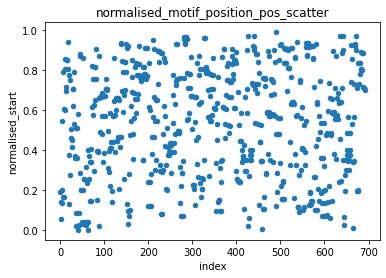

In [76]:
df_normalised_motif_position_pos.plot.scatter(x= 'index', y= 'normalised_start')
plt.title('normalised_motif_position_pos_scatter')

Text(0.5, 1.0, 'normalised_motif_position_pos_hist')

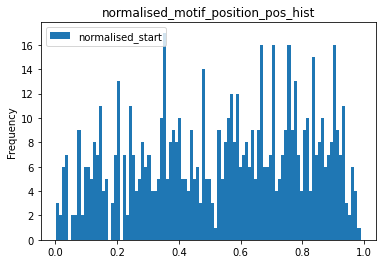

In [77]:
df_normalised_motif_position_pos.plot.hist(x= 'index', y= 'normalised_start', 
                                           stacked = True,  bins = 100)
plt.title('normalised_motif_position_pos_hist')

Text(0.5, 1.0, 'positive dataset normalised start position of motifs for Meloidogyne incognita')

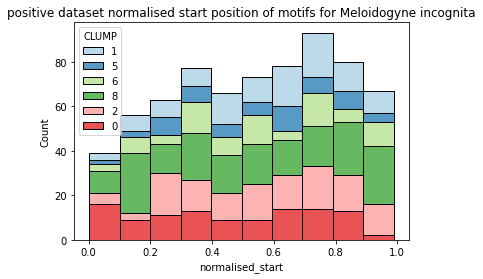

In [78]:
sns.color_palette("Paired")
pos_hist_start = sns.histplot(data=data_pos, x= 'normalised_start',hue='CLUMP', 
             multiple='stack', palette = 'Paired', bins = 10, 
                              hue_order = [1, 5, 6, 8, 2, 0])
plt.title("positive dataset normalised start position of motifs for Meloidogyne incognita")
#plt.savefig('pos_start_position_standard_scaling.pdf')

> - cluster 0 pas à la fin
> - 5 un peu partout
> - 7 un peu plus à la fin

##### Chi2 test

In [79]:
data_pos.head()

,CLUMP,normalised_start
0,0,0.192513
1,0,0.142292
2,0,0.056522
3,0,0.545455
4,0,0.200000


In [80]:
## Chi2 to see if there is a difference of repartition of the clusters among 
# the sequences

ranges = list(np.arange(0, 1.1, 0.1))
ranges

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [81]:
labels_ranges = list(np.arange(0, 100, 10))
labels_ranges

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [82]:
data_pos["norm_bins"] = pd.cut(x=data_pos["normalised_start"],
    bins= ranges,
    labels= labels_ranges)

In [83]:
data_pos.head()

,CLUMP,normalised_start,norm_bins
0,0,0.192513,10
1,0,0.142292,10
2,0,0.056522,0
3,0,0.545455,50
4,0,0.200000,10


In [84]:
# we are exporting the table so we can run the chi2 on R
#data_pos.to_csv('df_start_position_bins_pos.tsv', sep = '\t', index = False)

In [85]:
X = 'CLUMP'
Y = 'norm_bins'
cont = data_pos[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont

norm_bins,0,10,20,30,40,50,60,70,80,90
CLUMP,,,,,,,,,,
0,16,12,8,14,8,10,15,13,12,2
1,3,7,8,8,14,11,20,18,13,10
2,5,3,20,13,15,13,15,22,16,11
5,2,3,8,7,6,6,11,7,9,3
6,3,7,6,14,6,13,4,15,9,8
8,9,29,12,21,17,19,17,16,25,25


In [86]:
c, p, dof, expected = chi2_contingency(cont) 
p

0.00021104659464095274

In [87]:
#1.1367801963598922e-09 < 0.05 -> H1 accepted, lines and columns are not
# independant

#### Negative dataset

In [88]:
df_normalised_motif_position_neg = df_normalised_motif_position_neg.reset_index()
df_normalised_motif_position_neg = df_clusters_motifs.merge(df_normalised_motif_position_neg)

In [89]:
df_normalised_motif_position_neg.head()

,motif,CLUMP,index,id,start,end,normalised_start
0,WNS,0,0,Minc3s00019g01192,292,295,0.973333
1,WNS,0,1,Minc3s01772g26191,253,256,0.403509
2,WNS,0,2,Minc3s02816g31669,76,79,0.783505
3,NVY,0,3,Minc3s00021g01323,8,11,0.028470
4,NVY,0,4,Minc3s00031g01891,44,47,0.162362


In [90]:
df_normalised_motif_position_neg.shape

(286, 7)

In [91]:
data_neg = df_normalised_motif_position_neg.loc[:, ['CLUMP', 'normalised_start']]
data_neg.head(5)

,CLUMP,normalised_start
0,0,0.973333
1,0,0.403509
2,0,0.783505
3,0,0.028470
4,0,0.162362


In [92]:
data_neg.shape

(286, 2)

Text(0.5, 1.0, 'normalised_motif_position_neg_scatter')

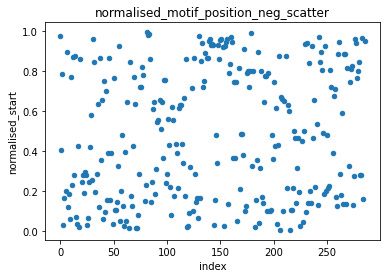

In [93]:
df_normalised_motif_position_neg.plot.scatter(x= 'index', y= 'normalised_start')
plt.title('normalised_motif_position_neg_scatter')

Text(0.5, 1.0, 'normalised_motif_position_neg_hist')

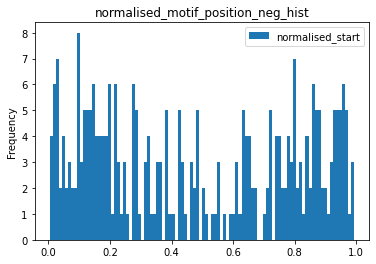

In [94]:
df_normalised_motif_position_neg.plot.hist(x= 'index', y= 'normalised_start', 
                                           stacked = True,  bins = 100)
plt.title('normalised_motif_position_neg_hist')

Text(0.5, 1.0, 'negative dataset normalised start position of motifs for Meloidogyne incognita')

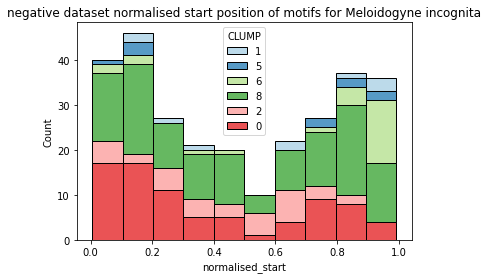

In [95]:
sns.color_palette("Paired")
neg_hist_start = sns.histplot(data=data_neg, x= 'normalised_start',hue='CLUMP', 
             multiple='stack', palette = 'Paired', bins = 10,
                             hue_order = [1, 5, 6, 8, 2, 0])
plt.title("negative dataset normalised start position of motifs for Meloidogyne incognita")
#plt.savefig('co_occ_neg_dset_clusters_hist_minc.pdf')

Text(0.5, 1.0, 'negative dataset normalised start position of motifs for Meloidogyne incognita')

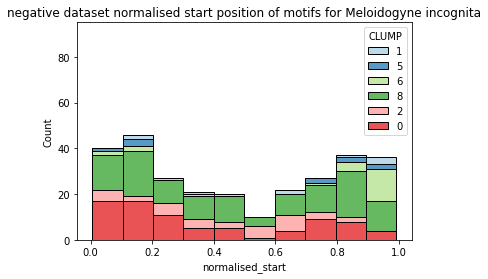

In [96]:
plt.ylim(0, 95)
sns.color_palette("Paired")
neg_hist_start = sns.histplot(data=data_neg, x= 'normalised_start',hue='CLUMP', 
             multiple='stack', palette = 'Paired', bins = 10,
                             hue_order = [1, 5, 6, 8, 2, 0])
plt.title("negative dataset normalised start position of motifs for Meloidogyne incognita")
#plt.savefig('neg_start_position_standard_scaling.pdf')

##### Chi2 test

In [97]:
data_neg.head()

,CLUMP,normalised_start
0,0,0.973333
1,0,0.403509
2,0,0.783505
3,0,0.028470
4,0,0.162362


In [98]:
data_neg["norm_bins"] = pd.cut(x=data_neg["normalised_start"],
    bins= ranges,
    labels= labels_ranges)

In [99]:
data_neg.head()

,CLUMP,normalised_start,norm_bins
0,0,0.973333,90
1,0,0.403509,40
2,0,0.783505,70
3,0,0.028470,0
4,0,0.162362,10


In [100]:
# we are exporting the table so we can run the chi2 on R
#data_pos.to_csv('df_start_position_bins_pos.tsv', sep = '\t', index = False)

In [101]:
X = 'CLUMP'
Y = 'norm_bins'
cont_neg = data_neg[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont_neg

norm_bins,0,10,20,30,40,50,60,70,80,90
CLUMP,,,,,,,,,,
0,17,17,11,5,5,1,5,8,9,3
1,0,2,1,1,0,0,2,0,1,3
2,5,2,5,4,3,5,7,3,2,0
5,1,3,0,0,0,0,0,2,2,2
6,2,2,0,1,1,0,0,1,4,14
8,13,22,10,10,13,3,8,15,18,12


In [102]:
c, p, dof, expected = chi2_contingency(cont_neg) 
p

1.8519600565786418e-07

In [103]:
# 0.020798081213885645 < 0.05 -> H1 accepted, lines and columns are not
# independant but not as significantly as in the positive dataset

# Counting_true_label_species 

## Positive dataset

In [104]:
df_pos_counting['true_label'] = 1
df_pos_counting.head()

,id,CLUMP,motif,nb_counts,true_label
0,AAR37375.1,0,WNS,1,1
1,Minc3s00139g05823,0,WNS,1,1
2,Minc3s00520g13673,0,WNS,1,1
3,Minc3s03136g32914,0,WNS,1,1
4,Minc3s10875g44433,0,WNS,1,1


In [105]:
df_pos_counting.shape

(593, 5)

## Negative dataset

In [106]:
df_neg_counting['true_label'] = 0
df_neg_counting.head()

,id,CLUMP,motif,nb_counts,true_label
0,Minc3s00019g01192,0,WNS,1,0
1,Minc3s01772g26191,0,WNS,1,0
2,Minc3s02816g31669,0,WNS,1,0
3,Minc3s00021g01323,0,NVY,1,0
4,Minc3s00031g01891,0,NVY,1,0


In [107]:
df_neg_counting.shape

(276, 5)

## Concat

In [108]:
df_count_spp_true_label = pd.concat([df_pos_counting, df_neg_counting])
df_count_spp_true_label.head()

,id,CLUMP,motif,nb_counts,true_label
0,AAR37375.1,0,WNS,1,1
1,Minc3s00139g05823,0,WNS,1,1
2,Minc3s00520g13673,0,WNS,1,1
3,Minc3s03136g32914,0,WNS,1,1
4,Minc3s10875g44433,0,WNS,1,1


In [109]:
df_count_spp_true_label.shape

(869, 5)

In [110]:
len(df_pos_counting) + len(df_neg_counting) == len(df_count_spp_true_label)

True

# Prediction : is the sequence an effector or not?

## pos_dataset

In [111]:
df_pos_counting.head()

,id,CLUMP,motif,nb_counts,true_label
0,AAR37375.1,0,WNS,1,1
1,Minc3s00139g05823,0,WNS,1,1
2,Minc3s00520g13673,0,WNS,1,1
3,Minc3s03136g32914,0,WNS,1,1
4,Minc3s10875g44433,0,WNS,1,1


In [112]:
pos_minc_found_by_clusters = pd.DataFrame(df_pos_counting.loc[:, 'id']).drop_duplicates()
pos_minc_found_by_clusters['predict_label'] = 1
pos_minc_found_by_clusters.head()

,id,predict_label
0,AAR37375.1,1
1,Minc3s00139g05823,1
2,Minc3s00520g13673,1
3,Minc3s03136g32914,1
4,Minc3s10875g44433,1


In [113]:
pos_minc_found_by_clusters.shape

(129, 2)

## neg_dataset

In [114]:
df_neg_counting.head()

,id,CLUMP,motif,nb_counts,true_label
0,Minc3s00019g01192,0,WNS,1,0
1,Minc3s01772g26191,0,WNS,1,0
2,Minc3s02816g31669,0,WNS,1,0
3,Minc3s00021g01323,0,NVY,1,0
4,Minc3s00031g01891,0,NVY,1,0


In [115]:
neg_minc_found_by_clusters = pd.DataFrame(df_neg_counting.loc[:, 'id']).drop_duplicates()
neg_minc_found_by_clusters['predict_label'] = 1
neg_minc_found_by_clusters.head()

,id,predict_label
0,Minc3s00019g01192,1
1,Minc3s01772g26191,1
2,Minc3s02816g31669,1
3,Minc3s00021g01323,1
4,Minc3s00031g01891,1


In [116]:
neg_minc_found_by_clusters.shape

(198, 2)

## Combining data

### predict_label == 1 (as effectors)

In [117]:
df_minc = df_datasets_information.loc[df_datasets_information['spp'] == 'minc']
df_minc = df_minc.loc[:, ['id', 'true_label']]
df_minc.head()

,id,true_label
0,Minc3s00007g00481,1
1,Minc3s00008g00574,1
2,Minc3s00011g00761,1
3,Minc3s00013g00811,1
4,Minc3s00020g01281,1


In [118]:
df_minc.shape

(656, 2)

In [119]:
pos_minc_found_by_clusters.head()

,id,predict_label
0,AAR37375.1,1
1,Minc3s00139g05823,1
2,Minc3s00520g13673,1
3,Minc3s03136g32914,1
4,Minc3s10875g44433,1


In [120]:
pos_minc_found_by_clusters.shape

(129, 2)

In [121]:
neg_minc_found_by_clusters.head()

,id,predict_label
0,Minc3s00019g01192,1
1,Minc3s01772g26191,1
2,Minc3s02816g31669,1
3,Minc3s00021g01323,1
4,Minc3s00031g01891,1


In [122]:
neg_minc_found_by_clusters.shape

(198, 2)

In [123]:
print('shape of df_minc : ', df_minc.shape, '\n',
     'shape of pos_minc_found_by_clusters :', 
      pos_minc_found_by_clusters.shape, '\n',
     'shape of neg_minc_found_by_clusters :',
     neg_minc_found_by_clusters.shape, '\n')

shape of df_minc :  (656, 2) 
 shape of pos_minc_found_by_clusters : (129, 2) 
 shape of neg_minc_found_by_clusters : (198, 2) 



In [124]:
pos_minc_found_by_clusters.shape[0]/161

0.8012422360248447

In [125]:
(495-neg_minc_found_by_clusters.shape[0])/495

0.6

In [126]:
predictions_minc = pos_minc_found_by_clusters.append(
    neg_minc_found_by_clusters)
predictions_minc.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/1094527747.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_minc = pos_minc_found_by_clusters.append(


,id,predict_label
0,AAR37375.1,1
1,Minc3s00139g05823,1
2,Minc3s00520g13673,1
3,Minc3s03136g32914,1
4,Minc3s10875g44433,1


In [127]:
predictions_minc.shape

(327, 2)

In [128]:
## here we have the predict labels and the true labels for all the
## sequences found as positive dataset sequences
df_predict_as_positive = predictions_minc.merge(df_minc)
df_predict_as_positive.head()

,id,predict_label,true_label
0,AAR37375.1,1,1
1,Minc3s00139g05823,1,1
2,Minc3s00520g13673,1,1
3,Minc3s03136g32914,1,1
4,Minc3s10875g44433,1,1


In [129]:
df_predict_as_positive.shape

(327, 3)

### predict_label == 0 (as non effectors)

#### neg found as neg

In [130]:
df_minc_neg = df_minc[df_minc['true_label'] == 0]
df_minc_neg.head()

,id,true_label
0,Minc3s00001g00059,0
1,Minc3s00002g00155,0
2,Minc3s00006g00398,0
3,Minc3s00006g00399,0
4,Minc3s00006g00405,0


In [131]:
df_minc_neg.shape

(495, 2)

In [132]:
lst_neg_found_as_pos_minc = list(neg_minc_found_by_clusters.loc[:, 'id'])
lst_neg_found_as_pos_minc

['Minc3s00019g01192',
 'Minc3s01772g26191',
 'Minc3s02816g31669',
 'Minc3s00021g01323',
 'Minc3s00031g01891',
 'Minc3s00070g03512',
 'Minc3s00131g05571',
 'Minc3s00131g05589',
 'Minc3s00153g06225',
 'Minc3s00174g06759',
 'Minc3s00223g07950',
 'Minc3s00399g11648',
 'Minc3s00432g12225',
 'Minc3s00524g13726',
 'Minc3s00535g13901',
 'Minc3s00600g14906',
 'Minc3s00803g17549',
 'Minc3s00930g18995',
 'Minc3s01171g21386',
 'Minc3s01243g22026',
 'Minc3s01504g24326',
 'Minc3s02191g28773',
 'Minc3s02347g29586',
 'Minc3s02367g29691',
 'Minc3s02659g31088',
 'Minc3s02910g32038',
 'Minc3s02994g32350',
 'Minc3s05942g39069',
 'Minc3s00141g05863',
 'Minc3s00477g13000',
 'Minc3s00590g14758',
 'Minc3s01624g25187',
 'Minc3s02991g32337',
 'Minc3s08790g42601',
 'Minc3s00022g01415',
 'Minc3s00015g01017',
 'Minc3s00019g01256',
 'Minc3s00022g01379',
 'Minc3s00022g01387',
 'Minc3s00037g02169',
 'Minc3s00104g04671',
 'Minc3s00120g05165',
 'Minc3s00130g05525',
 'Minc3s00198g07344',
 'Minc3s00209g07612',
 'Minc3s00

In [133]:
df_neg_found_as_neg_minc = df_minc_neg[~ df_minc_neg.id.isin(lst_neg_found_as_pos_minc)]
df_neg_found_as_neg_minc['predict_label'] = 0
df_neg_found_as_neg_minc.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/84899587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg_found_as_neg_minc['predict_label'] = 0


,id,true_label,predict_label
0,Minc3s00001g00059,0,0
2,Minc3s00006g00398,0,0
5,Minc3s00006g00420,0,0
6,Minc3s00009g00625,0,0
7,Minc3s00009g00626,0,0


In [134]:
df_neg_found_as_neg_minc.shape

(297, 3)

#### pos found as neg

In [135]:
df_minc_pos = df_minc[df_minc['true_label'] == 1]
df_minc_pos.head()

,id,true_label
0,Minc3s00007g00481,1
1,Minc3s00008g00574,1
2,Minc3s00011g00761,1
3,Minc3s00013g00811,1
4,Minc3s00020g01281,1


In [136]:
df_minc_pos.shape

(161, 2)

In [137]:
lst_pos_found_as_pos_minc = list(pos_minc_found_by_clusters.loc[:, 'id'])
lst_pos_found_as_pos_minc

['AAR37375.1',
 'Minc3s00139g05823',
 'Minc3s00520g13673',
 'Minc3s03136g32914',
 'Minc3s10875g44433',
 'AAM28240.1',
 'AAN15808.1',
 'AAQ97032.1',
 'CAC27774.1',
 'Minc3s00007g00481',
 'Minc3s00094g04359',
 'Minc3s00489g13198',
 'Minc3s00566g14364',
 'Minc3s00736g16684',
 'Minc3s01051g20218',
 'Minc3s01143g21148',
 'Minc3s03092g32741',
 'Minc3s03712g34585',
 'Minc3s05228g37838',
 'Minc3s06143g39406',
 'Minc3s09654g43422',
 'Minc3s09707g43466',
 'AAN15806.1',
 'AAQ10019.1',
 'AAR37373.1',
 'AEV57568.1',
 'Minc3s00338g10488',
 'Minc3s00381g11354',
 'Minc3s00970g19432',
 'Minc3s01020g19922',
 'Minc3s01352g23040',
 'Minc3s01614g25112',
 'Minc3s03471g33936',
 'Minc3s06678g40162',
 'Minc3s10691g44278',
 'AAR37368.1',
 'AAN08583.1',
 'Minc3s03024g32468',
 'AAZ77751.1',
 'Minc03866',
 'Minc3s00365g11074',
 'Minc3s02073g28116',
 'AAQ10018.1',
 'Minc3s00365g11061',
 'Minc3s02324g29465',
 'Minc3s10410g44057',
 'Minc3s00008g00574',
 'Minc3s01152g21216',
 'Minc3s00122g05244',
 'Minc3s00191g07172',

In [138]:
df_pos_found_as_neg_minc = df_minc_pos[~ df_minc_pos.id.isin(lst_pos_found_as_pos_minc)]
df_pos_found_as_neg_minc['predict_label'] = 0
df_pos_found_as_neg_minc.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/3964476533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_found_as_neg_minc['predict_label'] = 0


,id,true_label,predict_label
2,Minc3s00011g00761,1,0
3,Minc3s00013g00811,1,0
13,Minc3s00111g04880,1,0
16,Minc3s00127g05453,1,0
26,Minc3s00275g09180,1,0


#### Combining data

In [139]:
df_neg_found_as_neg_minc.head()

,id,true_label,predict_label
0,Minc3s00001g00059,0,0
2,Minc3s00006g00398,0,0
5,Minc3s00006g00420,0,0
6,Minc3s00009g00625,0,0
7,Minc3s00009g00626,0,0


In [140]:
df_pos_found_as_neg_minc.head()

,id,true_label,predict_label
2,Minc3s00011g00761,1,0
3,Minc3s00013g00811,1,0
13,Minc3s00111g04880,1,0
16,Minc3s00127g05453,1,0
26,Minc3s00275g09180,1,0


In [141]:
## here we have the predict labels and the true labels for all the
## sequences found as negative dataset sequences
df_predict_as_negative = df_neg_found_as_neg_minc.append(
    df_pos_found_as_neg_minc)
df_predict_as_negative.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/3717335609.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_predict_as_negative = df_neg_found_as_neg_minc.append(


,id,true_label,predict_label
0,Minc3s00001g00059,0,0
2,Minc3s00006g00398,0,0
5,Minc3s00006g00420,0,0
6,Minc3s00009g00625,0,0
7,Minc3s00009g00626,0,0


### Final data for metrics calculations

In [142]:
len(df_minc) == len(df_predict_as_negative) + len(df_predict_as_positive)

True

In [143]:
## True and false positives are in here
df_predict_as_positive.head()

,id,predict_label,true_label
0,AAR37375.1,1,1
1,Minc3s00139g05823,1,1
2,Minc3s00520g13673,1,1
3,Minc3s03136g32914,1,1
4,Minc3s10875g44433,1,1


In [144]:
df_predict_as_positive.shape

(327, 3)

In [145]:
## True and false negatives are in here
df_predict_as_negative.head()

,id,true_label,predict_label
0,Minc3s00001g00059,0,0
2,Minc3s00006g00398,0,0
5,Minc3s00006g00420,0,0
6,Minc3s00009g00625,0,0
7,Minc3s00009g00626,0,0


In [146]:
df_predict_as_negative.shape

(329, 3)

In [147]:
df_all_predictions_minc = df_predict_as_positive.append(df_predict_as_negative)
df_all_predictions_minc.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/2920236880.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_predictions_minc = df_predict_as_positive.append(df_predict_as_negative)


,id,predict_label,true_label
0,AAR37375.1,1,1
1,Minc3s00139g05823,1,1
2,Minc3s00520g13673,1,1
3,Minc3s03136g32914,1,1
4,Minc3s10875g44433,1,1


In [148]:
df_all_predictions_minc.shape

(656, 3)

# Metrics

## Confusion matrix

In [149]:
y_true = list(df_all_predictions_minc.loc[:, 'true_label'])
y_true

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [150]:
y_pred = list(df_all_predictions_minc.loc[:, 'predict_label'])
y_pred

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [151]:
confusion_matrix_minc = confusion_matrix(y_true, y_pred)
confusion_matrix_minc

array([[297, 198],
       [ 32, 129]])

In [152]:
df_metrics = pd.DataFrame(confusion_matrix_minc)
df_metrics

,0,1
0,297,198
1,32,129


In [153]:
df_metrics.da.export_metrics()

,0,1,micro-average
accuracy,0.649390,0.649390,0.64939
f1,0.720874,0.528689,0.64939
false_discovery_rate,0.097264,0.605505,0.35061
false_negative_rate,0.400000,0.198758,0.35061
false_positive_rate,0.198758,0.400000,0.35061
negative_predictive_value,0.394495,0.902736,0.64939
positive_predictive_value,0.902736,0.394495,0.64939
precision,0.902736,0.394495,0.64939
recall,0.600000,0.801242,0.64939
sensitivity,0.600000,0.801242,0.64939


# Co-occurrences

## Positive dataset

In [154]:
df_id_cluster = df_pos_counting.loc[:, ['id', 'CLUMP']].drop_duplicates()
df_id_cluster.head()

,id,CLUMP
0,AAR37375.1,0
1,Minc3s00139g05823,0
2,Minc3s00520g13673,0
3,Minc3s03136g32914,0
4,Minc3s10875g44433,0


In [155]:
len(df_id_cluster.id.drop_duplicates()) == len(pos_minc_found_by_clusters)

True

In [156]:
best_clusters

[1, 5, 6, 8, 2, 0]

In [157]:
## example of creating a subset of the dataframe
# to find all the sequences for cluster 0
df_id_cluster[df_id_cluster['CLUMP'] == 0].drop_duplicates().head()

,id,CLUMP
0,AAR37375.1,0
1,Minc3s00139g05823,0
2,Minc3s00520g13673,0
3,Minc3s03136g32914,0
4,Minc3s10875g44433,0


In [158]:
# creating a list of all the 
list(df_id_cluster[df_id_cluster['CLUMP'] == 0].drop_duplicates().id)

['AAR37375.1',
 'Minc3s00139g05823',
 'Minc3s00520g13673',
 'Minc3s03136g32914',
 'Minc3s10875g44433',
 'AAM28240.1',
 'AAN15808.1',
 'AAQ97032.1',
 'CAC27774.1',
 'Minc3s00007g00481',
 'Minc3s00094g04359',
 'Minc3s00489g13198',
 'Minc3s00566g14364',
 'Minc3s00736g16684',
 'Minc3s01051g20218',
 'Minc3s01143g21148',
 'Minc3s03092g32741',
 'Minc3s03712g34585',
 'Minc3s05228g37838',
 'Minc3s06143g39406',
 'Minc3s09654g43422',
 'Minc3s09707g43466',
 'AAN15806.1',
 'AAQ10019.1',
 'AAR37373.1',
 'AEV57568.1',
 'Minc3s00338g10488',
 'Minc3s00381g11354',
 'Minc3s00970g19432',
 'Minc3s01020g19922',
 'Minc3s01352g23040',
 'Minc3s01614g25112',
 'Minc3s03471g33936',
 'Minc3s06678g40162',
 'Minc3s10691g44278',
 'AAR37368.1',
 'AAN08583.1',
 'Minc3s03024g32468',
 'AAZ77751.1',
 'Minc03866',
 'Minc3s00365g11074',
 'Minc3s02073g28116',
 'AAQ10018.1',
 'Minc3s00365g11061',
 'Minc3s02324g29465',
 'Minc3s10410g44057',
 'Minc3s00008g00574',
 'Minc3s01152g21216',
 'Minc3s00122g05244',
 'Minc3s00191g07172',

In [159]:
dict_clu_seqs = {}

for i in best_clusters:
    df_tmp = df_id_cluster[df_id_cluster['CLUMP'] == i].drop_duplicates()
    dict_clu_seqs[i] = list(df_tmp.id)
dict_clu_seqs

{1: ['AAR37375.1',
  'Minc3s00139g05823',
  'Minc3s00520g13673',
  'Minc3s03136g32914',
  'Minc3s00736g16684',
  'Minc3s01051g20218',
  'Minc3s01143g21148',
  'Minc3s03092g32741',
  'Minc3s03712g34585',
  'Minc3s05228g37838',
  'Minc3s06143g39406',
  'Minc3s09654g43422',
  'Minc3s09707g43466',
  'CAC27774.1',
  'CL312Contig1_1-EST',
  'Minc3s00489g13198',
  'Minc3s00122g05244',
  'Minc3s00141g05855',
  'Minc3s00191g07172',
  'Minc3s01161g21288',
  'Minc3s01307g22634',
  'Minc3s01332g22850',
  'Minc3s01364g23158',
  'Minc3s02282g29253',
  'Minc3s06632g40101',
  'Minc3s09108g42931',
  'QPG92974.1',
  'Minc01696',
  'Minc3s00057g02969',
  'AAN15808.1',
  'AAN08583.1',
  'Minc3s03024g32468',
  'AAN15807.1',
  'Minc3s00465g12805',
  'Minc3s01509g24368',
  'Minc03866',
  'Minc3s10875g44433',
  'Minc00344',
  'Minc04584',
  'Minc3s01307g22639',
  'Minc3s00855g18130',
  'Minc3s08722g42535',
  'Minc3s00008g00574',
  'Minc3s01152g21216',
  'Minc3s00271g09100',
  'Minc3s01897g27031',
  'AAC05133.

In [160]:
dict_clu_seqs_set = {}
for CLUMP, sequences in dict_clu_seqs.items():
    dict_clu_seqs_set[CLUMP] = set(sequences)
dict_clu_seqs_set

{1: {'AAC05133.1',
  'AAN08583.1',
  'AAN15807.1',
  'AAN15808.1',
  'AAR37375.1',
  'CAC27774.1',
  'CL312Contig1_1-EST',
  'Minc00344',
  'Minc01696',
  'Minc03866',
  'Minc04584',
  'Minc3s00008g00574',
  'Minc3s00057g02969',
  'Minc3s00122g05244',
  'Minc3s00139g05823',
  'Minc3s00139g05824',
  'Minc3s00141g05855',
  'Minc3s00191g07172',
  'Minc3s00271g09100',
  'Minc3s00465g12805',
  'Minc3s00489g13198',
  'Minc3s00520g13673',
  'Minc3s00677g15958',
  'Minc3s00736g16684',
  'Minc3s00855g18130',
  'Minc3s01051g20218',
  'Minc3s01143g21148',
  'Minc3s01152g21216',
  'Minc3s01161g21288',
  'Minc3s01307g22634',
  'Minc3s01307g22639',
  'Minc3s01332g22850',
  'Minc3s01364g23158',
  'Minc3s01509g24368',
  'Minc3s01897g27031',
  'Minc3s02282g29253',
  'Minc3s03024g32468',
  'Minc3s03092g32741',
  'Minc3s03136g32914',
  'Minc3s03712g34585',
  'Minc3s04123g35534',
  'Minc3s05228g37838',
  'Minc3s06143g39406',
  'Minc3s06632g40101',
  'Minc3s08722g42535',
  'Minc3s09108g42931',
  'Minc3s096

In [161]:
def plot_upset(dict_clu_seqs_set):
    upset_data_sub = upsetplot.from_contents(dict_clu_seqs_set)
    upsetplot.plot(upset_data_sub, show_counts='%d', 
                   sort_by='cardinality', sort_categories_by = None)
    ## order of the categories is upside down: the best cluster is the last
    ## not the first
    return

Text(0.5, 0.98, 'co-occurrences in the positive dataset for the best CLUMPs for Meloidogyne incognita')

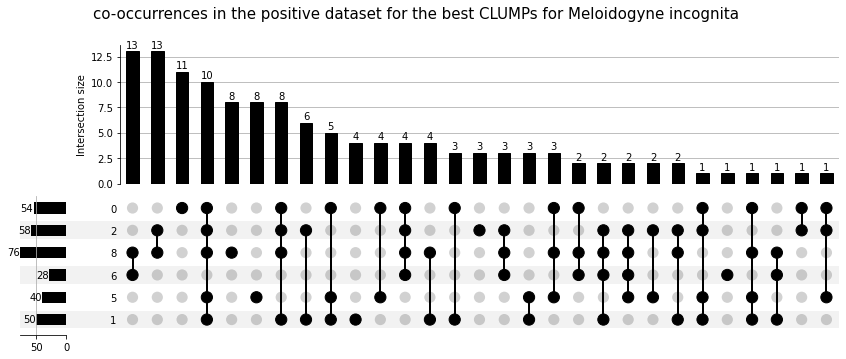

In [162]:
plt.rcParams["figure.figsize"] = (15,10)
plot_upset(dict_clu_seqs_set)
plt.suptitle(
    'co-occurrences in the positive dataset for the best CLUMPs for Meloidogyne incognita', size = 15)
#plt.savefig('pos_dset_co_occ_standard_scaling.pdf')

In [163]:
print('in the positive dataset: ', '\n', )

for CLUMP in dict_clu_seqs:
    print('number of sequences of cluster', CLUMP, ':', 
          len(dict_clu_seqs[CLUMP]), ', normalised : ', len(dict_clu_seqs[CLUMP])/161, '\n')

in the positive dataset:  

number of sequences of cluster 1 : 50 , normalised :  0.3105590062111801 

number of sequences of cluster 5 : 40 , normalised :  0.2484472049689441 

number of sequences of cluster 6 : 28 , normalised :  0.17391304347826086 

number of sequences of cluster 8 : 76 , normalised :  0.4720496894409938 

number of sequences of cluster 2 : 58 , normalised :  0.36024844720496896 

number of sequences of cluster 0 : 54 , normalised :  0.33540372670807456 



In [164]:
dict_clu_seqs_set

{1: {'AAC05133.1',
  'AAN08583.1',
  'AAN15807.1',
  'AAN15808.1',
  'AAR37375.1',
  'CAC27774.1',
  'CL312Contig1_1-EST',
  'Minc00344',
  'Minc01696',
  'Minc03866',
  'Minc04584',
  'Minc3s00008g00574',
  'Minc3s00057g02969',
  'Minc3s00122g05244',
  'Minc3s00139g05823',
  'Minc3s00139g05824',
  'Minc3s00141g05855',
  'Minc3s00191g07172',
  'Minc3s00271g09100',
  'Minc3s00465g12805',
  'Minc3s00489g13198',
  'Minc3s00520g13673',
  'Minc3s00677g15958',
  'Minc3s00736g16684',
  'Minc3s00855g18130',
  'Minc3s01051g20218',
  'Minc3s01143g21148',
  'Minc3s01152g21216',
  'Minc3s01161g21288',
  'Minc3s01307g22634',
  'Minc3s01307g22639',
  'Minc3s01332g22850',
  'Minc3s01364g23158',
  'Minc3s01509g24368',
  'Minc3s01897g27031',
  'Minc3s02282g29253',
  'Minc3s03024g32468',
  'Minc3s03092g32741',
  'Minc3s03136g32914',
  'Minc3s03712g34585',
  'Minc3s04123g35534',
  'Minc3s05228g37838',
  'Minc3s06143g39406',
  'Minc3s06632g40101',
  'Minc3s08722g42535',
  'Minc3s09108g42931',
  'Minc3s096

## Negative dataset

In [165]:
df_id_cluster_neg = df_neg_counting.loc[:, ['id', 'CLUMP']].drop_duplicates()
df_id_cluster_neg.head()

,id,CLUMP
0,Minc3s00019g01192,0
1,Minc3s01772g26191,0
2,Minc3s02816g31669,0
3,Minc3s00021g01323,0
4,Minc3s00031g01891,0


In [166]:
len(df_id_cluster_neg.id.drop_duplicates()) == len(neg_minc_found_by_clusters)

True

In [167]:
## example of creating a subset of the dataframe
# to find all the sequences for cluster 0
df_id_cluster_neg[df_id_cluster_neg['CLUMP'] == 0].drop_duplicates().head()

,id,CLUMP
0,Minc3s00019g01192,0
1,Minc3s01772g26191,0
2,Minc3s02816g31669,0
3,Minc3s00021g01323,0
4,Minc3s00031g01891,0


In [168]:
# creating a list of all the 
list(df_id_cluster_neg[df_id_cluster_neg['CLUMP'] == 0].drop_duplicates().id)

['Minc3s00019g01192',
 'Minc3s01772g26191',
 'Minc3s02816g31669',
 'Minc3s00021g01323',
 'Minc3s00031g01891',
 'Minc3s00070g03512',
 'Minc3s00131g05571',
 'Minc3s00131g05589',
 'Minc3s00153g06225',
 'Minc3s00174g06759',
 'Minc3s00223g07950',
 'Minc3s00399g11648',
 'Minc3s00432g12225',
 'Minc3s00524g13726',
 'Minc3s00535g13901',
 'Minc3s00600g14906',
 'Minc3s00803g17549',
 'Minc3s00930g18995',
 'Minc3s01171g21386',
 'Minc3s01243g22026',
 'Minc3s01504g24326',
 'Minc3s02191g28773',
 'Minc3s02347g29586',
 'Minc3s02367g29691',
 'Minc3s02659g31088',
 'Minc3s02910g32038',
 'Minc3s02994g32350',
 'Minc3s05942g39069',
 'Minc3s00141g05863',
 'Minc3s00477g13000',
 'Minc3s00590g14758',
 'Minc3s01624g25187',
 'Minc3s02991g32337',
 'Minc3s08790g42601',
 'Minc3s00022g01415',
 'Minc3s00015g01017',
 'Minc3s00019g01256',
 'Minc3s00022g01379',
 'Minc3s00022g01387',
 'Minc3s00037g02169',
 'Minc3s00104g04671',
 'Minc3s00120g05165',
 'Minc3s00130g05525',
 'Minc3s00198g07344',
 'Minc3s00209g07612',
 'Minc3s00

In [169]:
dict_clu_seqs_neg = {}

for i in best_clusters:
    df_tmp_neg = df_id_cluster_neg[df_id_cluster_neg[
        'CLUMP'] == i].drop_duplicates()
    dict_clu_seqs_neg[i] = list(df_tmp_neg.id)
dict_clu_seqs_neg

{1: ['Minc3s04627g36695',
  'Minc3s02858g31835',
  'Minc3s02910g32038',
  'Minc3s00006g00399',
  'Minc3s00235g08213',
  'Minc3s00778g17228',
  'Minc3s03424g33798',
  'Minc3s01614g25110',
  'Minc3s00895g18611',
  'Minc3s01621g25158'],
 5: ['Minc3s00411g11853',
  'Minc3s01255g22142',
  'Minc3s01399g23489',
  'Minc3s02858g31836',
  'Minc3s03886g35067',
  'Minc3s00019g01195',
  'Minc3s00628g15304',
  'Minc3s00961g19324',
  'Minc3s02467g30196',
  'Minc3s06671g40151'],
 6: ['Minc3s01136g21068',
  'Minc3s01361g23137',
  'Minc3s00413g11907',
  'Minc3s04110g35501',
  'Minc3s10787g44365',
  'Minc3s00961g19324',
  'Minc3s00055g02867',
  'Minc3s00459g12674',
  'Minc3s00600g14906',
  'Minc3s01000g19730',
  'Minc3s01147g21174',
  'Minc3s04158g35626',
  'Minc3s00032g01942',
  'Minc3s00248g08522',
  'Minc3s04174g35667',
  'Minc3s01420g23681',
  'Minc3s02121g28414',
  'Minc3s00530g13810',
  'Minc3s00135g05697',
  'Minc3s01269g22302'],
 8: ['Minc3s00255g08728',
  'Minc3s00973g19461',
  'Minc3s02839g3175

In [170]:
dict_clu_seqs_neg_set = {}
for cluster, sequences in dict_clu_seqs_neg.items():
    dict_clu_seqs_neg_set[cluster] = set(sequences)
dict_clu_seqs_neg_set

{1: {'Minc3s00006g00399',
  'Minc3s00235g08213',
  'Minc3s00778g17228',
  'Minc3s00895g18611',
  'Minc3s01614g25110',
  'Minc3s01621g25158',
  'Minc3s02858g31835',
  'Minc3s02910g32038',
  'Minc3s03424g33798',
  'Minc3s04627g36695'},
 5: {'Minc3s00019g01195',
  'Minc3s00411g11853',
  'Minc3s00628g15304',
  'Minc3s00961g19324',
  'Minc3s01255g22142',
  'Minc3s01399g23489',
  'Minc3s02467g30196',
  'Minc3s02858g31836',
  'Minc3s03886g35067',
  'Minc3s06671g40151'},
 6: {'Minc3s00032g01942',
  'Minc3s00055g02867',
  'Minc3s00135g05697',
  'Minc3s00248g08522',
  'Minc3s00413g11907',
  'Minc3s00459g12674',
  'Minc3s00530g13810',
  'Minc3s00600g14906',
  'Minc3s00961g19324',
  'Minc3s01000g19730',
  'Minc3s01136g21068',
  'Minc3s01147g21174',
  'Minc3s01269g22302',
  'Minc3s01361g23137',
  'Minc3s01420g23681',
  'Minc3s02121g28414',
  'Minc3s04110g35501',
  'Minc3s04158g35626',
  'Minc3s04174g35667',
  'Minc3s10787g44365'},
 8: {'Minc3s00006g00405',
  'Minc3s00022g01388',
  'Minc3s00022g0141

Text(0.5, 0.98, 'co-occurrences in the negative dataset for the best CLUMPs for Meloidogyne incognita')

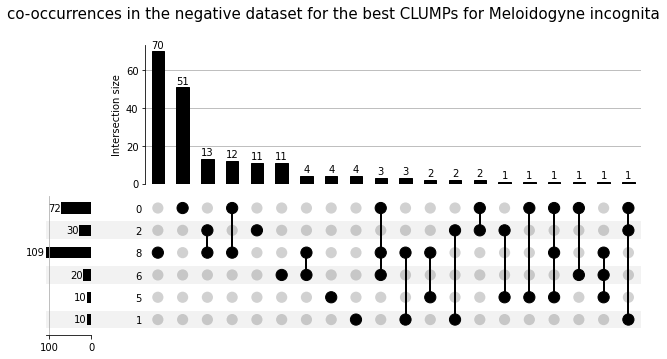

In [171]:
plt.rcParams["figure.figsize"] = (15,10)
plot_upset(dict_clu_seqs_neg_set)
plt.suptitle('co-occurrences in the negative dataset for the best CLUMPs for Meloidogyne incognita', size = 15)
#plt.savefig('neg_dset_co_occ_standard_scaling.pdf')

In [172]:
print('in the negative dataset: ', '\n', )
for CLUMP in dict_clu_seqs_neg:
    print('number of sequences of CLUMP', CLUMP, ':', 
          len(dict_clu_seqs_neg[CLUMP]), ', normalised : ', 
          len(dict_clu_seqs_neg[CLUMP])/495, '\n')

in the negative dataset:  

number of sequences of CLUMP 1 : 10 , normalised :  0.020202020202020204 

number of sequences of CLUMP 5 : 10 , normalised :  0.020202020202020204 

number of sequences of CLUMP 6 : 20 , normalised :  0.04040404040404041 

number of sequences of CLUMP 8 : 109 , normalised :  0.2202020202020202 

number of sequences of CLUMP 2 : 30 , normalised :  0.06060606060606061 

number of sequences of CLUMP 0 : 72 , normalised :  0.14545454545454545 



# Subpopulations

In [173]:
def save_supop_to_file(subp_ids, nb_subp, proteome = ""):
    """save_supop_to_file
       ------------------
       This function stores a subpopulation ids to 
       a csv file.
       
       Arguments:
       subp_ids -- list of subpopulation ids
       nb_subp -- string of the number of the subpopulation
       proteome -- string to indicate if the subpopulations 
                   are calculated from the proteome
    """
    name_col = proteome + "subpopulation" + nb_subp + "_ids"
    name_file= name_col +".csv"
    df_subp_ids = pd.DataFrame(subp_ids)
    df_subp_ids.rename(columns = {0:name_col}, inplace = True)
    df_subp_ids.to_csv(name_file)
    return df_subp_ids

## Subpopulation calculations

### Positive dataset

In [174]:
df_id_cluster

,id,CLUMP
0,AAR37375.1,0
1,Minc3s00139g05823,0
2,Minc3s00520g13673,0
3,Minc3s03136g32914,0
4,Minc3s10875g44433,0
...,...,...
579,AAN08589.1,8
580,Minc3s00173g06739,8
581,Minc3s00485g13130,8
583,Minc3s00855g18130,8


In [175]:
## positive dataset
## we are going to see all the intersections
X = 'id'
Y = 'CLUMP'
cont_id_cluster = df_id_cluster[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont_id_cluster = cont_id_cluster.rename_axis(None,axis=1)
cont_id_cluster = cont_id_cluster.reset_index()
cont_id_cluster['row_sums'] = cont_id_cluster.sum(axis = 1)
cont_id_cluster.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/1113072224.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cont_id_cluster['row_sums'] = cont_id_cluster.sum(axis = 1)


,id,0,1,2,5,6,8,row_sums
0,AAC05133.1,0,1,0,0,0,0,1
1,AAL40720.1,0,0,1,1,1,1,4
2,AAM28240.1,1,0,1,0,0,0,2
3,AAN08579.1,0,0,1,0,0,1,2
4,AAN08580.1,0,0,1,0,0,1,2


In [176]:
df_1_5 = cont_id_cluster.loc[:, ['id', 1,5]]
df_1_5['rows_sums'] = df_1_5.sum(axis = 1)
df_1_5.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/1112424269.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1_5['rows_sums'] = df_1_5.sum(axis = 1)


,id,1,5,rows_sums
0,AAC05133.1,1,0,1
1,AAL40720.1,0,1,1
2,AAM28240.1,0,0,0
3,AAN08579.1,0,0,0
4,AAN08580.1,0,0,0


In [177]:
## Subpopulation 1
subpopulation1 = df_1_5[df_1_5['rows_sums'] >= 2]
subpopulation1_ids = list(subpopulation1.id)
print(len(subpopulation1_ids))

## saving to file
save_supop_to_file(subpopulation1_ids, "_pos_1")

## showing the list of ids
subpopulation1_ids

20


['AAN15808.1',
 'AAR37375.1',
 'CAC27774.1',
 'Minc03866',
 'Minc3s00008g00574',
 'Minc3s00139g05823',
 'Minc3s00465g12805',
 'Minc3s00489g13198',
 'Minc3s00736g16684',
 'Minc3s01051g20218',
 'Minc3s01143g21148',
 'Minc3s01152g21216',
 'Minc3s01509g24368',
 'Minc3s03092g32741',
 'Minc3s03712g34585',
 'Minc3s04123g35534',
 'Minc3s05228g37838',
 'Minc3s06143g39406',
 'Minc3s09654g43422',
 'Minc3s09707g43466']

In [178]:
## Subpopulation2
subpopulation2_ids = list(set(df_1_5[df_1_5['rows_sums'] > 0].id) & set(
    cont_id_cluster[cont_id_cluster['row_sums'] >= 2].id))
print(len(subpopulation2_ids))
print(len(subpopulation2_ids), "-", len(subpopulation1_ids))
subpopulation2_ids = list(set(subpopulation2_ids) - set(subpopulation1_ids))
print(len(subpopulation2_ids))

## saving to file
save_supop_to_file(subpopulation2_ids, "_pos_2")

## showing the list of ids
subpopulation2_ids

58
58 - 20
38


['Minc3s01307g22639',
 'AAZ77751.1',
 'Minc3s01307g22634',
 'Minc3s00094g04359',
 'Minc3s00724g16553',
 'AAQ97032.1',
 'Minc3s00191g07172',
 'Minc01696',
 'Minc3s00057g02969',
 'Minc3s00007g00481',
 'Minc3s08722g42535',
 'QPG92974.1',
 'Minc3s03024g32468',
 'Minc3s01161g21288',
 'AAL40720.1',
 'Minc3s00365g11074',
 'Minc3s00127g05433',
 'Minc3s06632g40101',
 'Minc3s09108g42931',
 'Minc3s00566g14364',
 'Minc3s02282g29253',
 'Minc3s00122g05244',
 'Minc3s00520g13673',
 'Minc3s00271g09100',
 'Minc3s00141g05855',
 'Minc3s01897g27031',
 'Minc04584',
 'Minc3s00855g18130',
 'CL312Contig1_1-EST',
 'Minc3s01332g22850',
 'Minc3s03136g32914',
 'Minc3s01364g23158',
 'AAN08583.1',
 'Minc3s00970g19432',
 'Minc00344',
 'Minc3s10875g44433',
 'Minc3s01107g20785',
 'Minc3s02073g28116']

In [179]:
## Subpopulation3A
subpopulation3A = cont_id_cluster[cont_id_cluster['row_sums'] >= 2]
subpopulation3A_ids = list(subpopulation3A.id)
print(len(subpopulation3A_ids))
print(len(subpopulation3A_ids), "-", len(subpopulation2_ids))
subpopulation3A_ids = list(set(subpopulation3A_ids) - set(subpopulation2_ids))
print(len(subpopulation3A_ids), "-", len(subpopulation1_ids))
subpopulation3A_ids = list(set(subpopulation3A_ids) - set(subpopulation1_ids))
print(len(subpopulation3A_ids))

## saving to file
save_supop_to_file(subpopulation3A_ids, "_pos_3A")

## showing the list of ids
subpopulation3A_ids

94
94 - 38
56 - 20
36


['Minc3s08477g42291',
 'Minc3s00519g13664',
 'AAQ10018.1',
 'AAN15806.1',
 'AAN08580.1',
 'Minc3s02324g29465',
 'Minc3s00173g06738',
 'Minc3s06632g40099',
 'Minc3s00173g06739',
 'Minc3s01573g24822',
 'Minc3s00020g01295',
 'AAN52094.1',
 'Minc3s00083g03979',
 'Minc3s00876g18368',
 'Minc3s10410g44057',
 'Minc3s01112g20831',
 'Minc3s01325g22793',
 'AAM28240.1',
 'AAN08579.1',
 'Minc3s05895g38985',
 'Minc3s00485g13130',
 'AAN15809.1',
 'ASX95049.1',
 'Minc3s08308g42122',
 'Minc3s01322g22768',
 'AAN08589.1',
 'Minc3s00365g11061',
 'Minc3s01042g20118',
 'Minc3s00371g11166',
 'Minc3s01802g26418',
 'Minc3s00905g18741',
 'AEV57568.1',
 'Minc3s00583g14627',
 'Minc3s03978g35225',
 'Minc3s01525g24488',
 'Minc3s00079g03810']

In [180]:
## Subpopulation3B
subpopulation3B = df_1_5[df_1_5['rows_sums'] >= 1]
subpopulation3B_ids = list(subpopulation3B.id)
print(len(subpopulation3B_ids))
print(len(subpopulation3B_ids), "-", len(subpopulation2_ids))
subpopulation3B_ids = list(set(subpopulation3B_ids) - set(subpopulation2_ids))
print(len(subpopulation3B_ids), "-", len(subpopulation1_ids))
subpopulation3B_ids = list(set(subpopulation3B_ids) - set(subpopulation1_ids))
print(len(subpopulation3B_ids))

## saving to file
save_supop_to_file(subpopulation3B_ids, "_pos_3B")

## showing the list of ids
subpopulation3B_ids

70
70 - 38
32 - 20
12


['Minc3s00086g04105',
 'Minc3s00139g05824',
 'Minc3s01472g24105',
 'Minc3s00234g08205',
 'Minc06775',
 'Minc3s00451g12535',
 'Minc3s00083g03967',
 'Minc3s06335g39676',
 'Minc3s00677g15958',
 'AAN15807.1',
 'AAC05133.1',
 'Minc3s00020g01281']

In [181]:
## Subpopulation4
subpopulation4 = cont_id_cluster[cont_id_cluster['row_sums'] >= 1]
subpopulation4_ids = list(subpopulation4.id)
print(len(subpopulation4_ids))
all_monster = subpopulation4_ids
save_supop_to_file(all_monster, "_all_monster_pos")

print(len(subpopulation4_ids), "-", len(subpopulation3A_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation3A_ids))
print(len(subpopulation4_ids), "-", len(subpopulation3B_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation3B_ids))
print(len(subpopulation4_ids), "-", len(subpopulation2_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation2_ids))
print(len(subpopulation4_ids), "-", len(subpopulation1_ids))
subpopulation4_ids = list(set(subpopulation4_ids) - set(subpopulation1_ids))
print(len(subpopulation4_ids))

## saving to file
save_supop_to_file(subpopulation4_ids, "_pos_4")


## showing the list of ids
subpopulation4_ids

129
129 - 36
93 - 12
81 - 38
43 - 20
23


['Minc3s01020g19922',
 'Minc01595',
 'CL5Contig2_1-EST',
 'Minc3s00338g10488',
 'Minc3s06678g40162',
 'AAN08585.1',
 'AAN52092.1',
 'Minc3s10691g44278',
 'Minc3s00381g11354',
 'AAQ10022.1',
 'Minc3s00239g08307',
 'AAQ10023.1',
 'AAN08591.1',
 'Minc3s03471g33936',
 'Minc3s01352g23040',
 'AAR37368.1',
 'Minc3s01614g25112',
 'Minc3s00709g16396',
 'AAR37373.1',
 'AAN52093.1',
 'AAQ10021.1',
 'Minc3s00096g04440',
 'AAQ10019.1']

### Negative dataset

In [182]:
df_id_cluster_neg

,id,CLUMP
0,Minc3s00019g01192,0
1,Minc3s01772g26191,0
2,Minc3s02816g31669,0
3,Minc3s00021g01323,0
4,Minc3s00031g01891,0
...,...,...
268,Minc3s00248g08522,8
269,Minc3s00961g19324,8
270,Minc3s01269g22302,8
273,Minc3s04174g35667,8


In [183]:
## positive dataset
## we are going to see all the intersections
X = 'id'
Y = 'CLUMP'
cont_id_cluster_neg = df_id_cluster_neg[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
cont_id_cluster_neg = cont_id_cluster_neg.rename_axis(None,axis=1)
cont_id_cluster_neg = cont_id_cluster_neg.reset_index()
cont_id_cluster_neg['row_sums'] = cont_id_cluster_neg.sum(axis = 1)
cont_id_cluster_neg.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/2563136681.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cont_id_cluster_neg['row_sums'] = cont_id_cluster_neg.sum(axis = 1)


,id,0,1,2,5,6,8,row_sums
0,Minc3s00002g00155,0,0,1,0,0,0,1
1,Minc3s00006g00399,0,1,1,0,0,0,2
2,Minc3s00006g00405,0,0,0,0,0,1,1
3,Minc3s00015g01017,1,0,0,0,0,0,1
4,Minc3s00019g01192,1,0,0,0,0,0,1


In [184]:
df_1_5_neg = cont_id_cluster_neg.loc[:, ['id', 1,5]]
df_1_5_neg['rows_sums'] = df_1_5_neg.sum(axis = 1)
df_1_5_neg.head()

/var/folders/zt/60nvhxc96sl6cc55nljbkpz40000gn/T/ipykernel_64826/3272459314.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_1_5_neg['rows_sums'] = df_1_5_neg.sum(axis = 1)


,id,1,5,rows_sums
0,Minc3s00002g00155,0,0,0
1,Minc3s00006g00399,1,0,1
2,Minc3s00006g00405,0,0,0
3,Minc3s00015g01017,0,0,0
4,Minc3s00019g01192,0,0,0


In [185]:
## Subpopulation 1
subpopulation1_neg = df_1_5_neg[df_1_5_neg['rows_sums'] >= 2]
subpopulation1_ids_neg = list(subpopulation1_neg.id)
print(len(subpopulation1_ids_neg))

## saving to file
save_supop_to_file(subpopulation1_ids_neg, "_neg_1")

## showing the list of ids
subpopulation1_ids_neg

0


[]

In [186]:
## Subpopulation2
subpopulation2_ids_neg = list(set(df_1_5_neg[df_1_5_neg['rows_sums'] > 0].id) & set(
    cont_id_cluster_neg[cont_id_cluster_neg['row_sums'] >= 2].id))
print(len(subpopulation2_ids_neg))
print(len(subpopulation2_ids_neg), "-", len(subpopulation1_ids_neg))
subpopulation2_ids_neg = list(set(subpopulation2_ids_neg) - set(subpopulation1_ids_neg))
print(len(subpopulation2_ids_neg))

## saving to file
save_supop_to_file(subpopulation2_ids_neg, "_neg_2")

## showing the list of ids
subpopulation2_ids_neg

12
12 - 0
12


['Minc3s00006g00399',
 'Minc3s00778g17228',
 'Minc3s00961g19324',
 'Minc3s02858g31836',
 'Minc3s01255g22142',
 'Minc3s06671g40151',
 'Minc3s04627g36695',
 'Minc3s03424g33798',
 'Minc3s00235g08213',
 'Minc3s02467g30196',
 'Minc3s02910g32038',
 'Minc3s03886g35067']

In [187]:
## Subpopulation3A
subpopulation3A_neg = cont_id_cluster_neg[cont_id_cluster_neg['row_sums'] >= 2]
subpopulation3A_ids_neg = list(subpopulation3A_neg.id)
print(len(subpopulation3A_ids_neg))
print(len(subpopulation3A_ids_neg), "-", len(subpopulation2_ids_neg))
subpopulation3A_ids_neg = list(set(subpopulation3A_ids_neg) - set(subpopulation2_ids_neg))
print(len(subpopulation3A_ids_neg), "-", len(subpopulation1_ids_neg))
subpopulation3A_ids_neg = list(set(subpopulation3A_ids_neg) - set(subpopulation1_ids_neg))
print(len(subpopulation3A_ids_neg))

## saving to file
save_supop_to_file(subpopulation3A_ids_neg, "_neg_3A")

## showing the list of ids
subpopulation3A_ids_neg

47
47 - 12
35 - 0
35


['Minc3s04174g35667',
 'Minc3s00032g01942',
 'Minc3s03016g32442',
 'Minc3s00182g06981',
 'Minc3s00070g03518',
 'Minc3s00973g19461',
 'Minc3s02347g29586',
 'Minc3s00248g08522',
 'Minc3s00279g09279',
 'Minc3s07830g41582',
 'Minc3s00361g10971',
 'Minc3s00413g11907',
 'Minc3s00418g11986',
 'Minc3s01269g22302',
 'Minc3s00255g08728',
 'Minc3s00600g14906',
 'Minc3s01243g22026',
 'Minc3s01294g22556',
 'Minc3s00773g17155',
 'Minc3s04155g35618',
 'Minc3s00031g01891',
 'Minc3s00153g06225',
 'Minc3s02991g32337',
 'Minc3s02367g29691',
 'Minc3s00459g12674',
 'Minc3s06499g39914',
 'Minc3s00178g06862',
 'Minc3s01171g21386',
 'Minc3s00070g03519',
 'Minc3s02277g29222',
 'Minc3s02121g28414',
 'Minc3s00072g03577',
 'Minc3s00464g12793',
 'Minc3s00022g01415',
 'Minc3s02994g32350']

In [188]:
## Subpopulation3B
subpopulation3B_neg = df_1_5_neg[df_1_5_neg['rows_sums'] >= 1]
subpopulation3B_ids_neg = list(subpopulation3B_neg.id)
print(len(subpopulation3B_ids_neg))
print(len(subpopulation3B_ids_neg), "-", len(subpopulation2_ids_neg))
subpopulation3B_ids_neg = list(set(subpopulation3B_ids_neg) - set(subpopulation2_ids_neg))
print(len(subpopulation3B_ids_neg), "-", len(subpopulation1_ids_neg))
subpopulation3B_ids_neg = list(set(subpopulation3B_ids_neg) - set(subpopulation1_ids_neg))
print(len(subpopulation3B_ids_neg))

## saving to file
save_supop_to_file(subpopulation3B_ids_neg, "_neg_3B")

## showing the list of ids
subpopulation3B_ids_neg

20
20 - 12
8 - 0
8


['Minc3s00628g15304',
 'Minc3s00411g11853',
 'Minc3s01621g25158',
 'Minc3s00019g01195',
 'Minc3s00895g18611',
 'Minc3s01399g23489',
 'Minc3s01614g25110',
 'Minc3s02858g31835']

In [189]:
## Subpopulation4
subpopulation4_neg = cont_id_cluster_neg[cont_id_cluster_neg['row_sums'] >= 1]
subpopulation4_ids_neg = list(subpopulation4_neg.id)
print(len(subpopulation4_ids_neg))
print(len(subpopulation4_ids_neg), "-", len(subpopulation3A_ids_neg))
subpopulation4_ids_neg = list(set(subpopulation4_ids_neg) - set(subpopulation3A_ids_neg))
print(len(subpopulation4_ids_neg), "-", len(subpopulation3B_ids_neg))
subpopulation4_ids_neg = list(set(subpopulation4_ids_neg) - set(subpopulation3B_ids_neg))
print(len(subpopulation4_ids_neg), "-", len(subpopulation2_ids_neg))
subpopulation4_ids_neg = list(set(subpopulation4_ids_neg) - set(subpopulation2_ids_neg))
print(len(subpopulation4_ids_neg), "-", len(subpopulation1_ids_neg))
subpopulation4_ids_neg = list(set(subpopulation4_ids_neg) - set(subpopulation1_ids_neg))
print(len(subpopulation4_ids_neg))

## saving to file
save_supop_to_file(subpopulation4_ids_neg, "_neg_4")

## showing the list of ids
subpopulation4_ids_neg

198
198 - 35
163 - 8
155 - 12
143 - 0
143


['Minc3s02604g30845',
 'Minc3s07869g41632',
 'Minc3s02191g28773',
 'Minc3s00174g06759',
 'Minc3s04759g36951',
 'Minc3s00006g00405',
 'Minc3s00540g13975',
 'Minc3s01504g24326',
 'Minc3s00736g16677',
 'Minc3s09705g43464',
 'Minc3s01000g19730',
 'Minc3s01234g21940',
 'Minc3s00037g02169',
 'Minc3s00131g05583',
 'Minc3s02691g31206',
 'Minc3s00181g06963',
 'Minc3s00022g01379',
 'Minc3s04281g35922',
 'Minc3s00120g05165',
 'Minc3s00314g09993',
 'Minc3s00104g04671',
 'Minc3s00453g12570',
 'Minc3s01100g20721',
 'Minc3s00981g19540',
 'Minc3s00131g05571',
 'Minc3s03732g34636',
 'Minc3s00723g16541',
 'Minc3s01060g20322',
 'Minc3s00002g00155',
 'Minc3s08790g42601',
 'Minc3s00629g15336',
 'Minc3s00071g03531',
 'Minc3s00130g05525',
 'Minc3s03778g34779',
 'Minc3s00157g06333',
 'Minc3s01147g21174',
 'Minc3s01549g24637',
 'Minc3s00178g06856',
 'Minc3s01136g21068',
 'Minc3s00375g11217',
 'Minc3s00504g13424',
 'Minc3s02889g31969',
 'Minc3s00073g03623',
 'Minc3s05942g39069',
 'Minc3s01624g25187',
 'Minc3s01